___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("This will not show")

In [221]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [222]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [223]:
df.shape

(10000, 14)

In [224]:
df.duplicated().sum()

0

In [225]:
df.drop(columns=["RowNumber", "CustomerId"], inplace=True)

In [226]:
df.shape

(10000, 12)

In [227]:
df.duplicated().sum()

0

In [228]:
df.drop(columns="Surname", inplace = True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [230]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

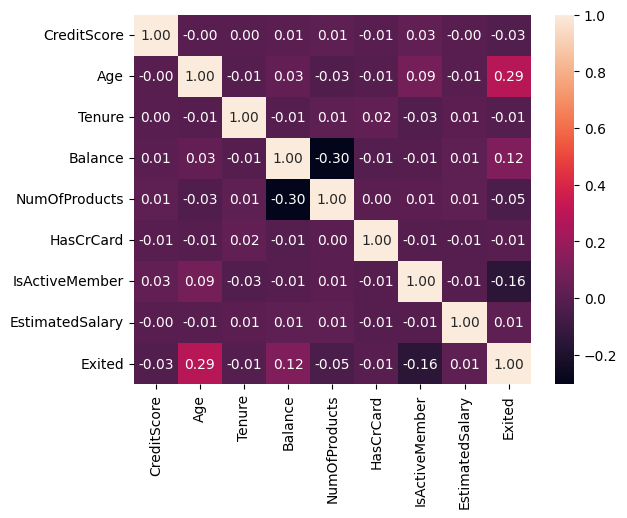

In [231]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

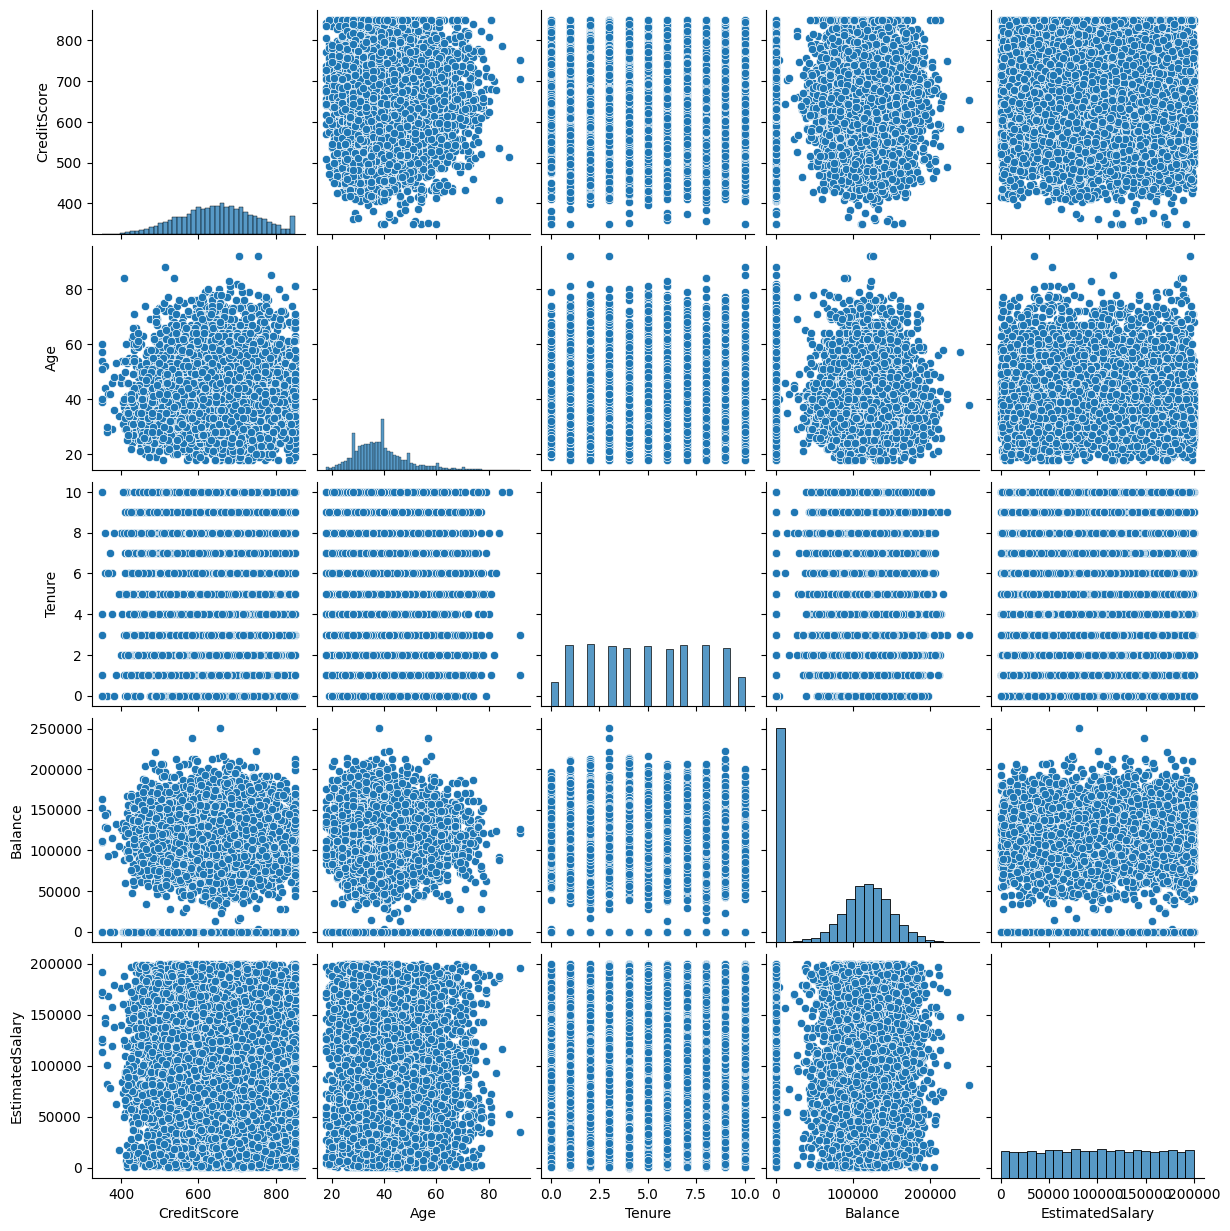

In [232]:
sns.pairplot(df[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

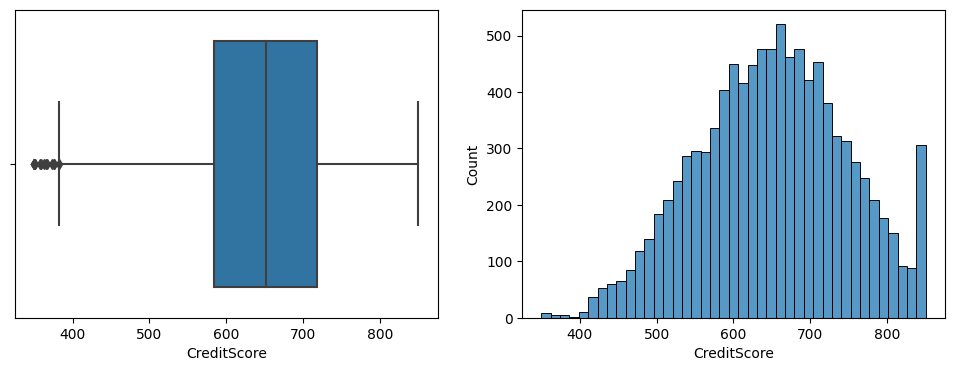

In [233]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df["CreditScore"])
plt.subplot(1,2,2)
sns.histplot(df["CreditScore"]);

In [234]:
df[df["CreditScore"] > 830][:20]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
24,846,France,Female,38,5,0.00,1,1,1,187616.16,0
38,850,France,Male,36,7,0.00,1,1,1,40812.90,0
43,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
180,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
200,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,850,France,Male,33,10,0.00,1,1,0,4861.72,1
259,850,Germany,Male,38,3,54901.01,1,1,1,140075.55,0
345,840,France,Female,43,7,0.00,2,1,0,90908.95,0
356,850,Spain,Female,57,8,126776.30,2,1,1,132298.49,0


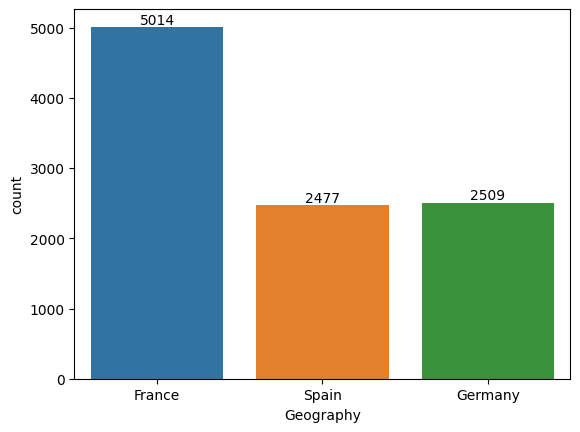

In [235]:
ax = sns.countplot(df["Geography"])
for i in ax.containers:
    ax.bar_label(i)

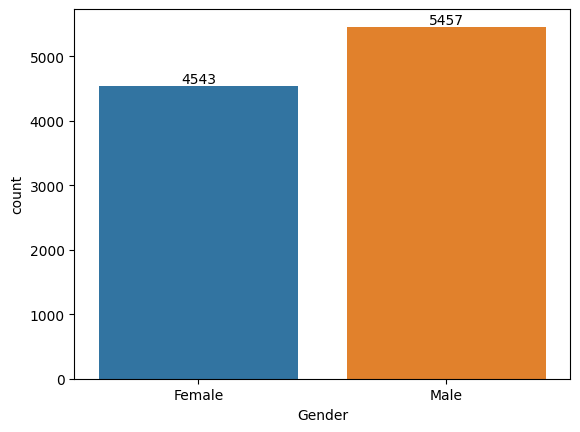

In [236]:
ax =sns.countplot(df["Gender"])
for i in ax.containers:
    ax.bar_label(i)

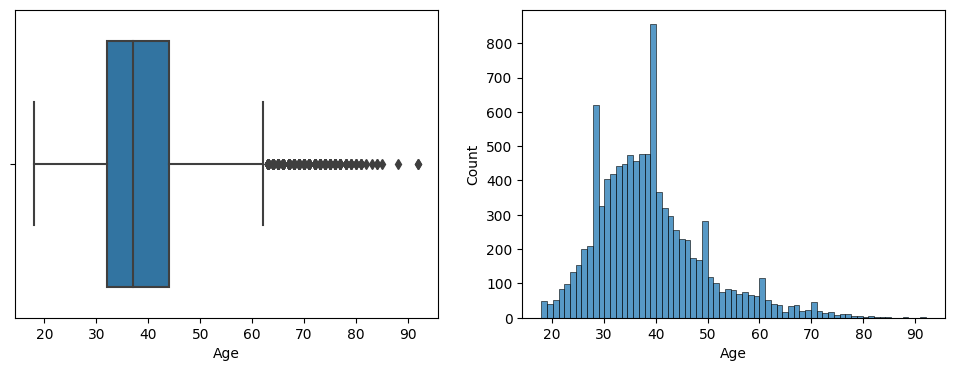

In [237]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df["Age"])
plt.subplot(1,2,2)
sns.histplot(df["Age"]);

In [238]:
df[df["Age"] > 90]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


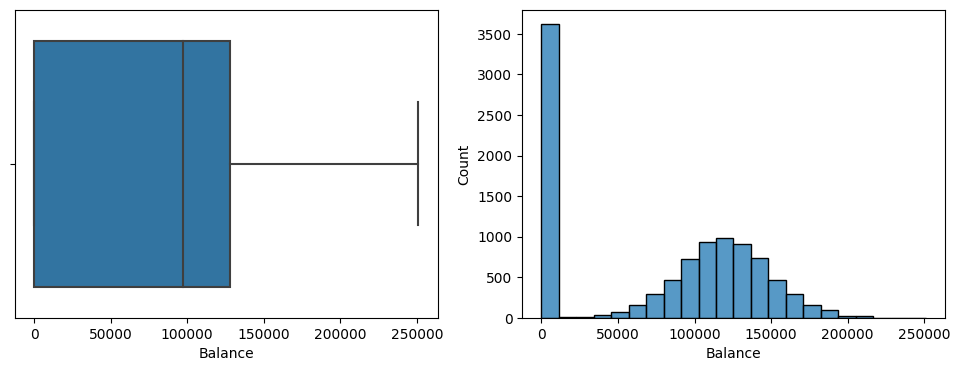

In [239]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df["Balance"])
plt.subplot(1,2,2)
sns.histplot(df["Balance"]);

In [240]:
df[df["Balance"] == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


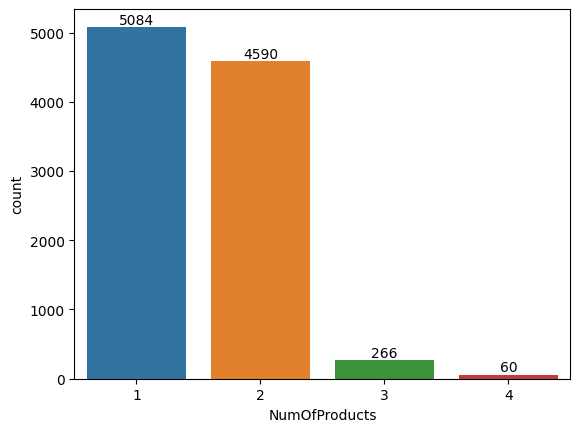

In [241]:
ax = sns.countplot(df["NumOfProducts"])
for i in ax.containers:
    ax.bar_label(i)

In [242]:
df[df["NumOfProducts"] == 4]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [243]:
df[df["NumOfProducts"] == 4].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,60.000000,60.000000,60.000000,60.00000,60.0,60.000000,60.000000,60.000000,60.0
mean,653.583333,45.683333,5.300000,93733.13500,4.0,0.683333,0.483333,104763.723333,1.0
std,101.265600,8.619040,2.947564,57507.38375,0.0,0.469102,0.503939,57526.494114,0.0
min,376.000000,29.000000,1.000000,0.00000,4.0,0.000000,0.000000,5669.310000,1.0
25%,595.000000,40.000000,2.750000,65787.32000,4.0,0.000000,0.000000,62033.390000,1.0
50%,643.000000,45.000000,5.000000,116808.19500,4.0,1.000000,0.000000,112163.105000,1.0
75%,708.000000,50.250000,8.000000,131589.51250,4.0,1.000000,1.000000,139371.955000,1.0
max,850.000000,68.000000,10.000000,195238.29000,4.0,1.000000,1.000000,198874.520000,1.0


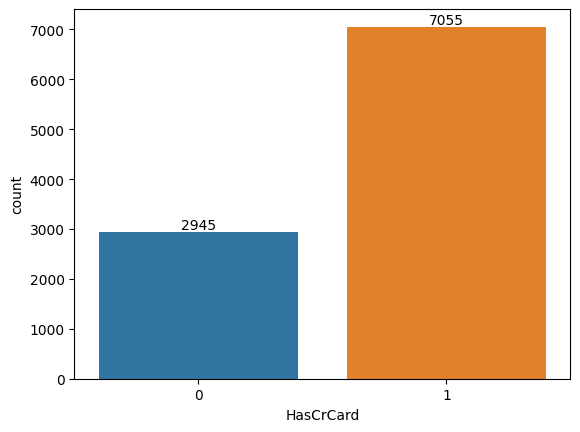

In [244]:
ax = sns.countplot(df["HasCrCard"])
for i in ax.containers:
    ax.bar_label(i)

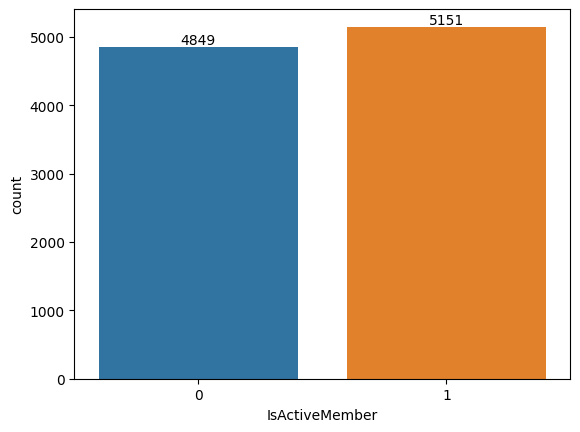

In [245]:
ax = sns.countplot(df["IsActiveMember"])
for i in ax.containers:
    ax.bar_label(i)

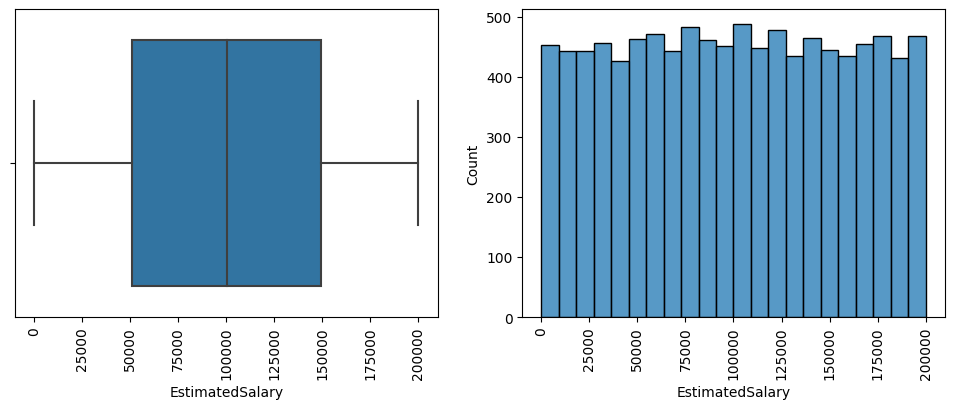

In [246]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df["EstimatedSalary"])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.histplot(df["EstimatedSalary"])
plt.xticks(rotation = 90);

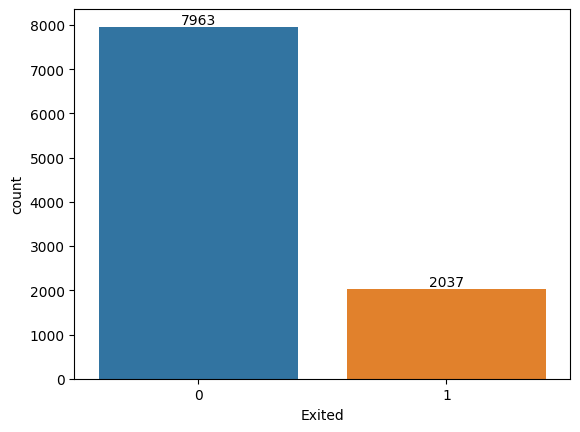

In [247]:
ax = sns.countplot(df["Exited"])
for i in ax.containers:
    ax.bar_label(i)

# Imbalance Data !!

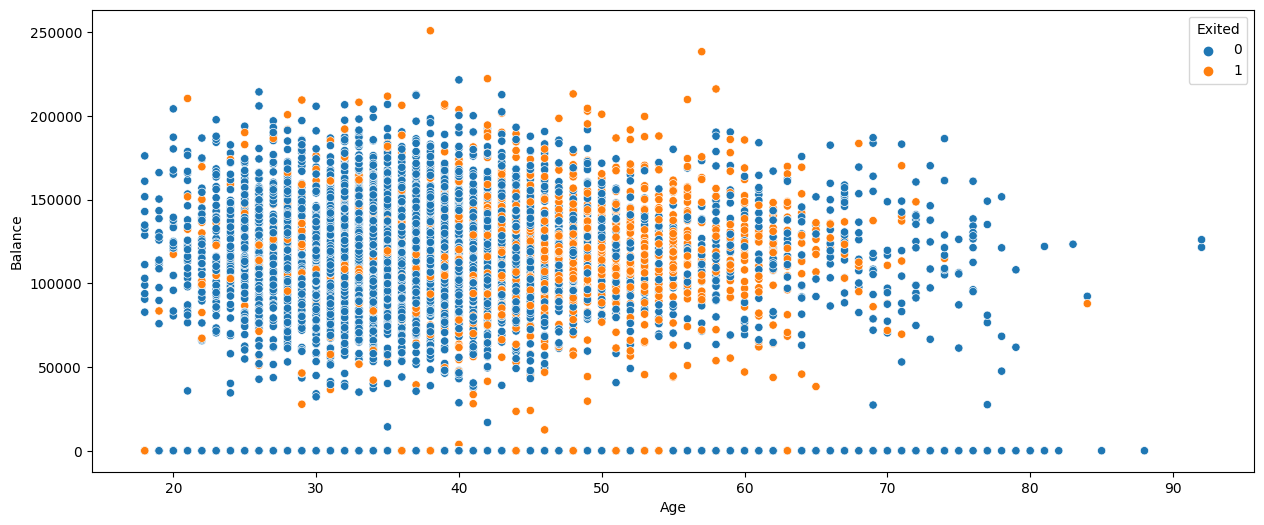

In [248]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data = df, x = "Age", y = "Balance", hue = "Exited");

<AxesSubplot:xlabel='Exited'>

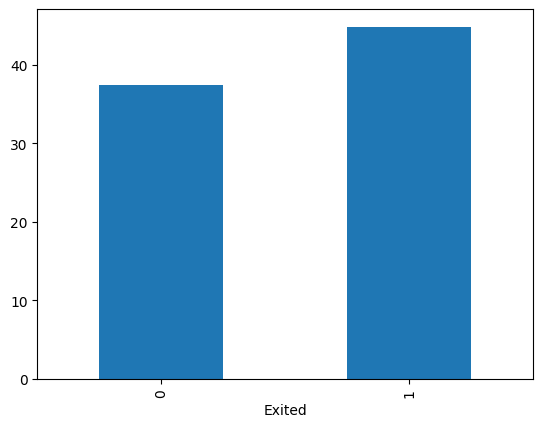

In [249]:
df.groupby("Exited")["Age"].mean().plot(kind = "bar")

# Preprocessing of Data
- Train | Test Split, Scalling

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [252]:
cat = df.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [254]:
enc = OrdinalEncoder()

In [255]:
df[cat] = enc.fit_transform(df[cat])

In [256]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0


In [257]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [258]:
seed = 42

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed, stratify = y)

In [260]:
X_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,0.0,1.0,57,7,0.00,1,1,0,159475.08
8392,739,1.0,1.0,32,3,102128.27,1,1,0,63981.37


In [261]:
scaler = MinMaxScaler()

In [262]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
X_train[:1]

array([[0.806     , 0.        , 1.        , 0.52702703, 0.7       ,
        0.        , 0.        , 1.        , 0.        , 0.79739365]])

# Modelling & Model Performance

In [264]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [265]:
X_train.shape

(8000, 10)

In [266]:
X_test.shape

(2000, 10)

## without class_weigth

### Create The Model

In [267]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [268]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 1ms/step - loss: 0.5178 - accuracy: 0.7896 - val_loss: 0.4743 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 908us/step - loss: 0.4851 - accuracy: 0.7947 - val_loss: 0.4609 - val_accuracy: 0.8100
Epoch 3/1000
225/225 [==============================] - 0s 924us/step - loss: 0.4694 - accuracy: 0.7958 - val_loss: 0.4450 - val_accuracy: 0.8125
Epoch 4/1000
225/225 [==============================] - 0s 961us/step - loss: 0.4524 - accuracy: 0.8053 - val_loss: 0.4364 - val_accuracy: 0.8150
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8100 - val_loss: 0.4265 - val_accuracy: 0.8263
Epoch 6/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8131 - val_loss: 0.4204 - val_accuracy: 0.8288
Epoch 7/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8171 - val_loss: 0.4181 - val_acc

225/225 [==============================] - 0s 894us/step - loss: 0.3547 - accuracy: 0.8575 - val_loss: 0.3361 - val_accuracy: 0.8537
Epoch 58/1000
225/225 [==============================] - 0s 810us/step - loss: 0.3549 - accuracy: 0.8539 - val_loss: 0.3277 - val_accuracy: 0.8687
Epoch 59/1000
225/225 [==============================] - 0s 854us/step - loss: 0.3528 - accuracy: 0.8533 - val_loss: 0.3298 - val_accuracy: 0.8712
Epoch 60/1000
225/225 [==============================] - 0s 780us/step - loss: 0.3531 - accuracy: 0.8557 - val_loss: 0.3250 - val_accuracy: 0.8650
Epoch 61/1000
225/225 [==============================] - 0s 823us/step - loss: 0.3521 - accuracy: 0.8578 - val_loss: 0.3313 - val_accuracy: 0.8675
Epoch 62/1000
225/225 [==============================] - 0s 825us/step - loss: 0.3543 - accuracy: 0.8554 - val_loss: 0.3257 - val_accuracy: 0.8700
Epoch 63/1000
225/225 [==============================] - 0s 751us/step - loss: 0.3537 - accuracy: 0.8553 - val_loss: 0.3258 - val_ac

Epoch 113/1000
225/225 [==============================] - 0s 814us/step - loss: 0.3440 - accuracy: 0.8590 - val_loss: 0.3204 - val_accuracy: 0.8625
Epoch 114/1000
225/225 [==============================] - 0s 814us/step - loss: 0.3448 - accuracy: 0.8579 - val_loss: 0.3181 - val_accuracy: 0.8687
Epoch 115/1000
225/225 [==============================] - 0s 756us/step - loss: 0.3449 - accuracy: 0.8568 - val_loss: 0.3184 - val_accuracy: 0.8675
Epoch 116/1000
225/225 [==============================] - 0s 816us/step - loss: 0.3447 - accuracy: 0.8592 - val_loss: 0.3193 - val_accuracy: 0.8725
Epoch 117/1000
225/225 [==============================] - 0s 801us/step - loss: 0.3451 - accuracy: 0.8574 - val_loss: 0.3194 - val_accuracy: 0.8650
Epoch 118/1000
225/225 [==============================] - 0s 793us/step - loss: 0.3444 - accuracy: 0.8587 - val_loss: 0.3244 - val_accuracy: 0.8650
Epoch 119/1000
225/225 [==============================] - 0s 784us/step - loss: 0.3456 - accuracy: 0.8597 - val_

225/225 [==============================] - 0s 887us/step - loss: 0.3388 - accuracy: 0.8589 - val_loss: 0.3146 - val_accuracy: 0.8737
Epoch 169/1000
225/225 [==============================] - 0s 929us/step - loss: 0.3401 - accuracy: 0.8599 - val_loss: 0.3147 - val_accuracy: 0.8687
Epoch 170/1000
225/225 [==============================] - 0s 895us/step - loss: 0.3412 - accuracy: 0.8583 - val_loss: 0.3139 - val_accuracy: 0.8687
Epoch 171/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8590 - val_loss: 0.3150 - val_accuracy: 0.8712
Epoch 172/1000
225/225 [==============================] - 0s 850us/step - loss: 0.3392 - accuracy: 0.8606 - val_loss: 0.3177 - val_accuracy: 0.8675
Epoch 173/1000
225/225 [==============================] - 0s 839us/step - loss: 0.3405 - accuracy: 0.8587 - val_loss: 0.3153 - val_accuracy: 0.8687
Epoch 174/1000
225/225 [==============================] - 0s 839us/step - loss: 0.3388 - accuracy: 0.8615 - val_loss: 0.3147 - va

225/225 [==============================] - 0s 848us/step - loss: 0.3349 - accuracy: 0.8611 - val_loss: 0.3137 - val_accuracy: 0.8687
Epoch 224/1000
225/225 [==============================] - 0s 775us/step - loss: 0.3338 - accuracy: 0.8628 - val_loss: 0.3155 - val_accuracy: 0.8750
Epoch 225/1000
225/225 [==============================] - 0s 831us/step - loss: 0.3341 - accuracy: 0.8619 - val_loss: 0.3133 - val_accuracy: 0.8712
Epoch 226/1000
225/225 [==============================] - 0s 804us/step - loss: 0.3335 - accuracy: 0.8628 - val_loss: 0.3217 - val_accuracy: 0.8687
Epoch 227/1000
225/225 [==============================] - 0s 785us/step - loss: 0.3339 - accuracy: 0.8618 - val_loss: 0.3172 - val_accuracy: 0.8737
Epoch 228/1000
225/225 [==============================] - 0s 844us/step - loss: 0.3350 - accuracy: 0.8622 - val_loss: 0.3162 - val_accuracy: 0.8712
Epoch 229/1000
225/225 [==============================] - 0s 814us/step - loss: 0.3333 - accuracy: 0.8615 - val_loss: 0.3124 - 

225/225 [==============================] - 0s 874us/step - loss: 0.3305 - accuracy: 0.8643 - val_loss: 0.3135 - val_accuracy: 0.8725
Epoch 279/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3297 - accuracy: 0.8669 - val_loss: 0.3095 - val_accuracy: 0.8712
Epoch 280/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3310 - accuracy: 0.8628 - val_loss: 0.3133 - val_accuracy: 0.8675
Epoch 281/1000
225/225 [==============================] - 0s 891us/step - loss: 0.3307 - accuracy: 0.8629 - val_loss: 0.3105 - val_accuracy: 0.8687
Epoch 282/1000
225/225 [==============================] - 0s 967us/step - loss: 0.3310 - accuracy: 0.8631 - val_loss: 0.3201 - val_accuracy: 0.8612
Epoch 283/1000
225/225 [==============================] - 0s 912us/step - loss: 0.3301 - accuracy: 0.8618 - val_loss: 0.3142 - val_accuracy: 0.8662
Epoch 284/1000
225/225 [==============================] - 0s 799us/step - loss: 0.3302 - accuracy: 0.8644 - val_loss: 0.3145 - 

Epoch 334/1000
225/225 [==============================] - 0s 903us/step - loss: 0.3289 - accuracy: 0.8647 - val_loss: 0.3123 - val_accuracy: 0.8675
Epoch 335/1000
225/225 [==============================] - 0s 967us/step - loss: 0.3285 - accuracy: 0.8637 - val_loss: 0.3074 - val_accuracy: 0.8687
Epoch 336/1000
225/225 [==============================] - 0s 931us/step - loss: 0.3279 - accuracy: 0.8635 - val_loss: 0.3084 - val_accuracy: 0.8712
Epoch 337/1000
225/225 [==============================] - 0s 876us/step - loss: 0.3293 - accuracy: 0.8635 - val_loss: 0.3112 - val_accuracy: 0.8700
Epoch 338/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8631 - val_loss: 0.3098 - val_accuracy: 0.8725
Epoch 339/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8665 - val_loss: 0.3143 - val_accuracy: 0.8637
Epoch 340/1000
225/225 [==============================] - 0s 967us/step - loss: 0.3291 - accuracy: 0.8597 - val_loss

225/225 [==============================] - 0s 925us/step - loss: 0.3260 - accuracy: 0.8667 - val_loss: 0.3076 - val_accuracy: 0.8675
Epoch 390/1000
225/225 [==============================] - 0s 952us/step - loss: 0.3255 - accuracy: 0.8649 - val_loss: 0.3047 - val_accuracy: 0.8675
Epoch 391/1000
225/225 [==============================] - 0s 942us/step - loss: 0.3267 - accuracy: 0.8674 - val_loss: 0.3079 - val_accuracy: 0.8612
Epoch 392/1000
225/225 [==============================] - 0s 938us/step - loss: 0.3274 - accuracy: 0.8647 - val_loss: 0.3064 - val_accuracy: 0.8637
Epoch 393/1000
225/225 [==============================] - 0s 983us/step - loss: 0.3261 - accuracy: 0.8632 - val_loss: 0.3067 - val_accuracy: 0.8650
Epoch 394/1000
225/225 [==============================] - 0s 977us/step - loss: 0.3265 - accuracy: 0.8618 - val_loss: 0.3060 - val_accuracy: 0.8700
Epoch 395/1000
225/225 [==============================] - 0s 922us/step - loss: 0.3263 - accuracy: 0.8653 - val_loss: 0.3062 - 

225/225 [==============================] - 0s 843us/step - loss: 0.3245 - accuracy: 0.8660 - val_loss: 0.3060 - val_accuracy: 0.8662
Epoch 445/1000
225/225 [==============================] - 0s 832us/step - loss: 0.3236 - accuracy: 0.8668 - val_loss: 0.3128 - val_accuracy: 0.8662
Epoch 446/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3251 - accuracy: 0.8647 - val_loss: 0.3074 - val_accuracy: 0.8675
Epoch 447/1000
225/225 [==============================] - 0s 824us/step - loss: 0.3247 - accuracy: 0.8650 - val_loss: 0.3080 - val_accuracy: 0.8712
Epoch 448/1000
225/225 [==============================] - 0s 817us/step - loss: 0.3259 - accuracy: 0.8661 - val_loss: 0.3050 - val_accuracy: 0.8650
Epoch 449/1000
225/225 [==============================] - 0s 863us/step - loss: 0.3254 - accuracy: 0.8653 - val_loss: 0.3082 - val_accuracy: 0.8662
Epoch 450/1000
225/225 [==============================] - 0s 842us/step - loss: 0.3240 - accuracy: 0.8640 - val_loss: 0.3084 - 

225/225 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8647 - val_loss: 0.3082 - val_accuracy: 0.8662
Epoch 500/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8662 - val_loss: 0.3063 - val_accuracy: 0.8662
Epoch 501/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8660 - val_loss: 0.3109 - val_accuracy: 0.8687
Epoch 502/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8672 - val_loss: 0.3079 - val_accuracy: 0.8675
Epoch 503/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8664 - val_loss: 0.3075 - val_accuracy: 0.8687
Epoch 504/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8658 - val_loss: 0.3096 - val_accuracy: 0.8675
Epoch 505/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8675 - val_loss: 0.3054 - val_accuracy: 

Epoch 555/1000
225/225 [==============================] - 0s 871us/step - loss: 0.3209 - accuracy: 0.8690 - val_loss: 0.3076 - val_accuracy: 0.8750
Epoch 556/1000
225/225 [==============================] - 0s 823us/step - loss: 0.3195 - accuracy: 0.8671 - val_loss: 0.3114 - val_accuracy: 0.8712
Epoch 557/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8681 - val_loss: 0.3275 - val_accuracy: 0.8562
Epoch 558/1000
225/225 [==============================] - 0s 804us/step - loss: 0.3188 - accuracy: 0.8675 - val_loss: 0.3164 - val_accuracy: 0.8737
Epoch 559/1000
225/225 [==============================] - 0s 896us/step - loss: 0.3211 - accuracy: 0.8658 - val_loss: 0.3075 - val_accuracy: 0.8712
Epoch 560/1000
225/225 [==============================] - 0s 982us/step - loss: 0.3204 - accuracy: 0.8689 - val_loss: 0.3119 - val_accuracy: 0.8700
Epoch 561/1000
225/225 [==============================] - 0s 862us/step - loss: 0.3190 - accuracy: 0.8690 - val_lo

225/225 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8676 - val_loss: 0.3105 - val_accuracy: 0.8750
Epoch 611/1000
225/225 [==============================] - 0s 938us/step - loss: 0.3178 - accuracy: 0.8694 - val_loss: 0.3140 - val_accuracy: 0.8750
Epoch 612/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8653 - val_loss: 0.3178 - val_accuracy: 0.8712
Epoch 613/1000
225/225 [==============================] - 0s 774us/step - loss: 0.3167 - accuracy: 0.8685 - val_loss: 0.3144 - val_accuracy: 0.8775
Epoch 614/1000
225/225 [==============================] - 0s 892us/step - loss: 0.3179 - accuracy: 0.8676 - val_loss: 0.3190 - val_accuracy: 0.8662
Epoch 615/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3195 - accuracy: 0.8693 - val_loss: 0.3126 - val_accuracy: 0.8763
Epoch 616/1000
225/225 [==============================] - 0s 872us/step - loss: 0.3182 - accuracy: 0.8714 - val_loss: 0.3156 - val_

225/225 [==============================] - 0s 841us/step - loss: 0.3169 - accuracy: 0.8690 - val_loss: 0.3105 - val_accuracy: 0.8763
Epoch 666/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3183 - accuracy: 0.8675 - val_loss: 0.3107 - val_accuracy: 0.8788
Epoch 667/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3165 - accuracy: 0.8664 - val_loss: 0.3137 - val_accuracy: 0.8725
Epoch 668/1000
225/225 [==============================] - 0s 980us/step - loss: 0.3167 - accuracy: 0.8679 - val_loss: 0.3123 - val_accuracy: 0.8737
Epoch 669/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3173 - accuracy: 0.8708 - val_loss: 0.3126 - val_accuracy: 0.8750
Epoch 670/1000
225/225 [==============================] - 0s 911us/step - loss: 0.3192 - accuracy: 0.8668 - val_loss: 0.3205 - val_accuracy: 0.8712
Epoch 671/1000
225/225 [==============================] - 0s 911us/step - loss: 0.3169 - accuracy: 0.8689 - val_loss: 0.3133 - 

225/225 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.8678 - val_loss: 0.3161 - val_accuracy: 0.8750
Epoch 721/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8694 - val_loss: 0.3168 - val_accuracy: 0.8700
Epoch 722/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8693 - val_loss: 0.3161 - val_accuracy: 0.8725
Epoch 723/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8704 - val_loss: 0.3166 - val_accuracy: 0.8763
Epoch 724/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8682 - val_loss: 0.3178 - val_accuracy: 0.8700
Epoch 725/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3167 - accuracy: 0.8690 - val_loss: 0.3125 - val_accuracy: 0.8687
Epoch 726/1000
225/225 [==============================] - 0s 980us/step - loss: 0.3167 - accuracy: 0.8694 - val_loss: 0.3205 - val_accura

Epoch 776/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8696 - val_loss: 0.3122 - val_accuracy: 0.8763
Epoch 777/1000
225/225 [==============================] - 0s 910us/step - loss: 0.3148 - accuracy: 0.8696 - val_loss: 0.3172 - val_accuracy: 0.8763
Epoch 778/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8704 - val_loss: 0.3202 - val_accuracy: 0.8687
Epoch 779/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8703 - val_loss: 0.3211 - val_accuracy: 0.8700
Epoch 780/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3157 - accuracy: 0.8689 - val_loss: 0.3194 - val_accuracy: 0.8788
Epoch 781/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3166 - accuracy: 0.8692 - val_loss: 0.3169 - val_accuracy: 0.8788
Epoch 782/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3142 - accuracy: 0.8706 - val_loss: 

225/225 [==============================] - 0s 821us/step - loss: 0.3146 - accuracy: 0.8721 - val_loss: 0.3208 - val_accuracy: 0.8737
Epoch 832/1000
225/225 [==============================] - 0s 925us/step - loss: 0.3137 - accuracy: 0.8678 - val_loss: 0.3232 - val_accuracy: 0.8700
Epoch 833/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3142 - accuracy: 0.8714 - val_loss: 0.3204 - val_accuracy: 0.8788
Epoch 834/1000
225/225 [==============================] - 0s 811us/step - loss: 0.3148 - accuracy: 0.8715 - val_loss: 0.3158 - val_accuracy: 0.8712
Epoch 835/1000
225/225 [==============================] - 0s 809us/step - loss: 0.3137 - accuracy: 0.8717 - val_loss: 0.3195 - val_accuracy: 0.8750
Epoch 836/1000
225/225 [==============================] - 0s 813us/step - loss: 0.3144 - accuracy: 0.8715 - val_loss: 0.3241 - val_accuracy: 0.8675
Epoch 837/1000
225/225 [==============================] - 0s 813us/step - loss: 0.3132 - accuracy: 0.8704 - val_loss: 0.3192 - 

225/225 [==============================] - 0s 832us/step - loss: 0.3138 - accuracy: 0.8694 - val_loss: 0.3264 - val_accuracy: 0.8625
Epoch 887/1000
225/225 [==============================] - 0s 910us/step - loss: 0.3136 - accuracy: 0.8715 - val_loss: 0.3223 - val_accuracy: 0.8712
Epoch 888/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3122 - accuracy: 0.8718 - val_loss: 0.3237 - val_accuracy: 0.8600
Epoch 889/1000
225/225 [==============================] - 0s 911us/step - loss: 0.3138 - accuracy: 0.8696 - val_loss: 0.3217 - val_accuracy: 0.8750
Epoch 890/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3127 - accuracy: 0.8710 - val_loss: 0.3245 - val_accuracy: 0.8700
Epoch 891/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3126 - accuracy: 0.8690 - val_loss: 0.3216 - val_accuracy: 0.8675
Epoch 892/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3135 - accuracy: 0.8696 - val_loss: 0.3172 - 

225/225 [==============================] - 0s 847us/step - loss: 0.3134 - accuracy: 0.8699 - val_loss: 0.3210 - val_accuracy: 0.8750
Epoch 942/1000
225/225 [==============================] - 0s 909us/step - loss: 0.3156 - accuracy: 0.8701 - val_loss: 0.3235 - val_accuracy: 0.8725
Epoch 943/1000
225/225 [==============================] - 0s 911us/step - loss: 0.3125 - accuracy: 0.8717 - val_loss: 0.3236 - val_accuracy: 0.8675
Epoch 944/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3120 - accuracy: 0.8724 - val_loss: 0.3284 - val_accuracy: 0.8662
Epoch 945/1000
225/225 [==============================] - 0s 838us/step - loss: 0.3126 - accuracy: 0.8717 - val_loss: 0.3231 - val_accuracy: 0.8637
Epoch 946/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3122 - accuracy: 0.8719 - val_loss: 0.3212 - val_accuracy: 0.8712
Epoch 947/1000
225/225 [==============================] - 0s 789us/step - loss: 0.3129 - accuracy: 0.8715 - val_loss: 0.3207 - 

225/225 [==============================] - 0s 783us/step - loss: 0.3128 - accuracy: 0.8721 - val_loss: 0.3230 - val_accuracy: 0.8737
Epoch 997/1000
225/225 [==============================] - 0s 838us/step - loss: 0.3119 - accuracy: 0.8715 - val_loss: 0.3235 - val_accuracy: 0.8687
Epoch 998/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3113 - accuracy: 0.8731 - val_loss: 0.3289 - val_accuracy: 0.8687
Epoch 999/1000
225/225 [==============================] - 0s 793us/step - loss: 0.3125 - accuracy: 0.8718 - val_loss: 0.3404 - val_accuracy: 0.8612
Epoch 1000/1000
225/225 [==============================] - 0s 945us/step - loss: 0.3135 - accuracy: 0.8715 - val_loss: 0.3327 - val_accuracy: 0.8737


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [269]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [270]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.517819,0.789583,0.474311,0.81000
1,0.485146,0.794722,0.460886,0.81000
2,0.469377,0.795833,0.445017,0.81250
3,0.452428,0.805278,0.436421,0.81500
4,0.443217,0.810000,0.426514,0.82625


<AxesSubplot:>

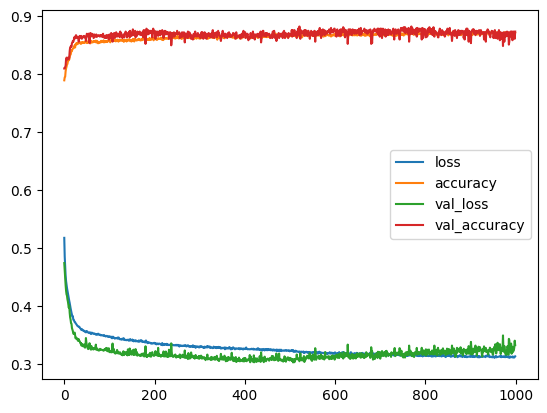

In [271]:
loss_df.plot()

In [272]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print("loss :" , loss)
print("accuracy :", accuracy)

loss : 0.378629595041275
accuracy : 0.8585000038146973


In [273]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 636us/step
[[1550   43]
 [ 240  167]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [274]:
from sklearn.utils import class_weight

In [275]:
class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}

In [276]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [277]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [278]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 32, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/1000
225/225 [==============================] - 1s 1ms/step - loss: 0.6828 - accuracy: 0.4268 - val_loss: 0.6550 - val_accuracy: 0.6300
Epoch 2/1000
225/225 [==============================] - 0s 983us/step - loss: 0.6258 - accuracy: 0.6553 - val_loss: 0.5942 - val_accuracy: 0.6837
Epoch 3/1000
225/225 [==============================] - 0s 906us/step - loss: 0.5966 - accuracy: 0.6679 - val_loss: 0.5875 - val_accuracy: 0.6775
Epoch 4/1000
225/225 [==============================] - 0s 886us/step - loss: 0.5811 - accuracy: 0.6769 - val_loss: 0.5146 - val_accuracy: 0.7588
Epoch 5/1000
225/225 [==============================] - 0s 884us/step - loss: 0.5726 - accuracy: 0.6978 - val_loss: 0.5393 - val_accuracy: 0.7287
Epoch 6/1000
225/225 [==============================] - 0s 900us/step - loss: 0.5649 - accuracy: 0.6997 - val_loss: 0.5330 - val_accuracy: 0.7175
Epoch 7/1000
225/225 [==============================] - 0s 893us/step - loss: 0.5570 - accuracy: 0.7046 - val_loss: 0.5249 - v

Epoch 57/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4761 - accuracy: 0.7638 - val_loss: 0.5082 - val_accuracy: 0.7362
Epoch 58/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4754 - accuracy: 0.7613 - val_loss: 0.4798 - val_accuracy: 0.7525
Epoch 59/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4735 - accuracy: 0.7625 - val_loss: 0.5047 - val_accuracy: 0.7412
Epoch 60/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4731 - accuracy: 0.7651 - val_loss: 0.4582 - val_accuracy: 0.7638
Epoch 61/1000
225/225 [==============================] - 0s 908us/step - loss: 0.4714 - accuracy: 0.7676 - val_loss: 0.4884 - val_accuracy: 0.7525
Epoch 62/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4738 - accuracy: 0.7615 - val_loss: 0.4637 - val_accuracy: 0.7588
Epoch 63/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4715 - accuracy: 0.7694 - val_loss: 0

Epoch 113/1000
225/225 [==============================] - 0s 908us/step - loss: 0.4524 - accuracy: 0.7885 - val_loss: 0.4675 - val_accuracy: 0.7575
Epoch 114/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4518 - accuracy: 0.7872 - val_loss: 0.4462 - val_accuracy: 0.7750
Epoch 115/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4525 - accuracy: 0.7875 - val_loss: 0.4247 - val_accuracy: 0.7837
Epoch 116/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4527 - accuracy: 0.7887 - val_loss: 0.4707 - val_accuracy: 0.7663
Epoch 117/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4529 - accuracy: 0.7831 - val_loss: 0.4322 - val_accuracy: 0.7837
Epoch 118/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4506 - accuracy: 0.7900 - val_loss: 0.4832 - val_accuracy: 0.7563
Epoch 119/1000
225/225 [==============================] - 0s 911us/step - loss: 0.4549 - accuracy: 0.7854 - val_

225/225 [==============================] - 0s 809us/step - loss: 0.4441 - accuracy: 0.7968 - val_loss: 0.4070 - val_accuracy: 0.8037
Epoch 169/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4455 - accuracy: 0.7951 - val_loss: 0.4056 - val_accuracy: 0.8012
Epoch 170/1000
225/225 [==============================] - 0s 981us/step - loss: 0.4462 - accuracy: 0.7958 - val_loss: 0.4167 - val_accuracy: 0.7912
Epoch 171/1000
225/225 [==============================] - 0s 911us/step - loss: 0.4453 - accuracy: 0.7965 - val_loss: 0.3996 - val_accuracy: 0.8138
Epoch 172/1000
225/225 [==============================] - 0s 911us/step - loss: 0.4461 - accuracy: 0.7944 - val_loss: 0.4395 - val_accuracy: 0.7788
Epoch 173/1000
225/225 [==============================] - 0s 845us/step - loss: 0.4448 - accuracy: 0.7951 - val_loss: 0.4162 - val_accuracy: 0.7925
Epoch 174/1000
225/225 [==============================] - 0s 905us/step - loss: 0.4442 - accuracy: 0.7943 - val_loss: 0.3974 - 

225/225 [==============================] - 0s 841us/step - loss: 0.4412 - accuracy: 0.7946 - val_loss: 0.3949 - val_accuracy: 0.8062
Epoch 224/1000
225/225 [==============================] - 0s 981us/step - loss: 0.4411 - accuracy: 0.8001 - val_loss: 0.4476 - val_accuracy: 0.7738
Epoch 225/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4407 - accuracy: 0.7943 - val_loss: 0.4223 - val_accuracy: 0.7825
Epoch 226/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4400 - accuracy: 0.7925 - val_loss: 0.4183 - val_accuracy: 0.7925
Epoch 227/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4416 - accuracy: 0.7957 - val_loss: 0.4293 - val_accuracy: 0.7812
Epoch 228/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4412 - accuracy: 0.7949 - val_loss: 0.4648 - val_accuracy: 0.7663
Epoch 229/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4404 - accuracy: 0.7925 - val_loss: 0.4104 - 

225/225 [==============================] - 0s 980us/step - loss: 0.4389 - accuracy: 0.7981 - val_loss: 0.3935 - val_accuracy: 0.8112
Epoch 279/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4371 - accuracy: 0.7987 - val_loss: 0.4415 - val_accuracy: 0.7725
Epoch 280/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4378 - accuracy: 0.7958 - val_loss: 0.4356 - val_accuracy: 0.7750
Epoch 281/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4377 - accuracy: 0.7972 - val_loss: 0.4609 - val_accuracy: 0.7600
Epoch 282/1000
225/225 [==============================] - 0s 911us/step - loss: 0.4386 - accuracy: 0.7969 - val_loss: 0.5003 - val_accuracy: 0.7425
Epoch 283/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4377 - accuracy: 0.7958 - val_loss: 0.4963 - val_accuracy: 0.7525
Epoch 284/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4384 - accuracy: 0.7958 - val_loss: 0.4535 - 

Epoch 334/1000
225/225 [==============================] - 0s 816us/step - loss: 0.4352 - accuracy: 0.7960 - val_loss: 0.4653 - val_accuracy: 0.7613
Epoch 335/1000
225/225 [==============================] - 0s 896us/step - loss: 0.4357 - accuracy: 0.7962 - val_loss: 0.4121 - val_accuracy: 0.8025
Epoch 336/1000
225/225 [==============================] - 0s 875us/step - loss: 0.4360 - accuracy: 0.8010 - val_loss: 0.3966 - val_accuracy: 0.8075
Epoch 337/1000
225/225 [==============================] - 0s 928us/step - loss: 0.4379 - accuracy: 0.7960 - val_loss: 0.3959 - val_accuracy: 0.8050
Epoch 338/1000
225/225 [==============================] - 0s 870us/step - loss: 0.4350 - accuracy: 0.7968 - val_loss: 0.3954 - val_accuracy: 0.8012
Epoch 339/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7992 - val_loss: 0.4455 - val_accuracy: 0.7700
Epoch 340/1000
225/225 [==============================] - 0s 863us/step - loss: 0.4356 - accuracy: 0.7950 - val_lo

225/225 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8003 - val_loss: 0.4450 - val_accuracy: 0.7725
Epoch 390/1000
225/225 [==============================] - 0s 966us/step - loss: 0.4318 - accuracy: 0.7976 - val_loss: 0.4308 - val_accuracy: 0.7900
Epoch 391/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7965 - val_loss: 0.4189 - val_accuracy: 0.8037
Epoch 392/1000
225/225 [==============================] - 0s 991us/step - loss: 0.4338 - accuracy: 0.7972 - val_loss: 0.4462 - val_accuracy: 0.7750
Epoch 393/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7964 - val_loss: 0.4322 - val_accuracy: 0.7850
Epoch 394/1000
225/225 [==============================] - 0s 896us/step - loss: 0.4331 - accuracy: 0.7974 - val_loss: 0.4045 - val_accuracy: 0.7950
Epoch 395/1000
225/225 [==============================] - 0s 889us/step - loss: 0.4325 - accuracy: 0.7986 - val_loss: 0.4088 - val_ac

225/225 [==============================] - 0s 841us/step - loss: 0.4311 - accuracy: 0.8010 - val_loss: 0.4504 - val_accuracy: 0.7800
Epoch 445/1000
225/225 [==============================] - 0s 902us/step - loss: 0.4305 - accuracy: 0.7975 - val_loss: 0.4574 - val_accuracy: 0.7650
Epoch 446/1000
225/225 [==============================] - 0s 987us/step - loss: 0.4326 - accuracy: 0.7971 - val_loss: 0.4328 - val_accuracy: 0.7788
Epoch 447/1000
225/225 [==============================] - 0s 975us/step - loss: 0.4316 - accuracy: 0.7983 - val_loss: 0.4255 - val_accuracy: 0.7825
Epoch 448/1000
225/225 [==============================] - 0s 933us/step - loss: 0.4321 - accuracy: 0.7967 - val_loss: 0.4145 - val_accuracy: 0.7987
Epoch 449/1000
225/225 [==============================] - 0s 884us/step - loss: 0.4321 - accuracy: 0.8007 - val_loss: 0.4617 - val_accuracy: 0.7625
Epoch 450/1000
225/225 [==============================] - 0s 840us/step - loss: 0.4320 - accuracy: 0.7967 - val_loss: 0.3835 - 

Epoch 500/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8003 - val_loss: 0.4414 - val_accuracy: 0.7788
Epoch 501/1000
225/225 [==============================] - 0s 843us/step - loss: 0.4295 - accuracy: 0.7971 - val_loss: 0.4326 - val_accuracy: 0.7763
Epoch 502/1000
225/225 [==============================] - 0s 862us/step - loss: 0.4295 - accuracy: 0.7999 - val_loss: 0.4207 - val_accuracy: 0.7862
Epoch 503/1000
225/225 [==============================] - 0s 916us/step - loss: 0.4270 - accuracy: 0.7999 - val_loss: 0.4043 - val_accuracy: 0.8138
Epoch 504/1000
225/225 [==============================] - 0s 870us/step - loss: 0.4302 - accuracy: 0.8021 - val_loss: 0.4637 - val_accuracy: 0.7638
Epoch 505/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.7960 - val_loss: 0.4252 - val_accuracy: 0.7850
Epoch 506/1000
225/225 [==============================] - 0s 995us/step - loss: 0.4311 - accuracy: 0.7996 - val_loss

225/225 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7939 - val_loss: 0.4163 - val_accuracy: 0.7912
Epoch 556/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7999 - val_loss: 0.4466 - val_accuracy: 0.7812
Epoch 557/1000
225/225 [==============================] - 0s 936us/step - loss: 0.4288 - accuracy: 0.7971 - val_loss: 0.4535 - val_accuracy: 0.7650
Epoch 558/1000
225/225 [==============================] - 0s 926us/step - loss: 0.4283 - accuracy: 0.7982 - val_loss: 0.3849 - val_accuracy: 0.8125
Epoch 559/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8014 - val_loss: 0.4116 - val_accuracy: 0.7987
Epoch 560/1000
225/225 [==============================] - 0s 926us/step - loss: 0.4281 - accuracy: 0.8004 - val_loss: 0.4902 - val_accuracy: 0.7588
Epoch 561/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.7915 - val_loss: 0.4458 - val_accu

Epoch 611/1000
225/225 [==============================] - 0s 878us/step - loss: 0.4265 - accuracy: 0.8015 - val_loss: 0.4510 - val_accuracy: 0.7713
Epoch 612/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.7990 - val_loss: 0.4657 - val_accuracy: 0.7638
Epoch 613/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4263 - accuracy: 0.7967 - val_loss: 0.4421 - val_accuracy: 0.7750
Epoch 614/1000
225/225 [==============================] - 0s 891us/step - loss: 0.4255 - accuracy: 0.8026 - val_loss: 0.4915 - val_accuracy: 0.7525
Epoch 615/1000
225/225 [==============================] - 0s 815us/step - loss: 0.4281 - accuracy: 0.7962 - val_loss: 0.4403 - val_accuracy: 0.7738
Epoch 616/1000
225/225 [==============================] - 0s 857us/step - loss: 0.4274 - accuracy: 0.7972 - val_loss: 0.4116 - val_accuracy: 0.7912
Epoch 617/1000
225/225 [==============================] - 0s 920us/step - loss: 0.4300 - accuracy: 0.7971 - val_lo

225/225 [==============================] - 0s 849us/step - loss: 0.4269 - accuracy: 0.7961 - val_loss: 0.4502 - val_accuracy: 0.7750
Epoch 667/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4246 - accuracy: 0.7962 - val_loss: 0.3995 - val_accuracy: 0.8062
Epoch 668/1000
225/225 [==============================] - 0s 930us/step - loss: 0.4234 - accuracy: 0.7997 - val_loss: 0.4605 - val_accuracy: 0.7700
Epoch 669/1000
225/225 [==============================] - 0s 870us/step - loss: 0.4261 - accuracy: 0.7983 - val_loss: 0.4268 - val_accuracy: 0.7837
Epoch 670/1000
225/225 [==============================] - 0s 945us/step - loss: 0.4257 - accuracy: 0.7950 - val_loss: 0.4085 - val_accuracy: 0.8037
Epoch 671/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8010 - val_loss: 0.4070 - val_accuracy: 0.8037
Epoch 672/1000
225/225 [==============================] - 0s 900us/step - loss: 0.4239 - accuracy: 0.7990 - val_loss: 0.4595 - va

225/225 [==============================] - 0s 915us/step - loss: 0.4249 - accuracy: 0.7943 - val_loss: 0.4287 - val_accuracy: 0.7812
Epoch 722/1000
225/225 [==============================] - 0s 894us/step - loss: 0.4230 - accuracy: 0.7983 - val_loss: 0.4413 - val_accuracy: 0.7837
Epoch 723/1000
225/225 [==============================] - 0s 866us/step - loss: 0.4259 - accuracy: 0.7983 - val_loss: 0.4629 - val_accuracy: 0.7613
Epoch 724/1000
225/225 [==============================] - 0s 884us/step - loss: 0.4238 - accuracy: 0.7964 - val_loss: 0.4186 - val_accuracy: 0.7875
Epoch 725/1000
225/225 [==============================] - 0s 898us/step - loss: 0.4242 - accuracy: 0.7990 - val_loss: 0.3947 - val_accuracy: 0.8025
Epoch 726/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.7960 - val_loss: 0.4695 - val_accuracy: 0.7613
Epoch 727/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7942 - val_loss: 0.4760 - val_

225/225 [==============================] - 0s 862us/step - loss: 0.4223 - accuracy: 0.7925 - val_loss: 0.4423 - val_accuracy: 0.7837
Epoch 777/1000
225/225 [==============================] - 0s 886us/step - loss: 0.4207 - accuracy: 0.7985 - val_loss: 0.3949 - val_accuracy: 0.8125
Epoch 778/1000
225/225 [==============================] - 0s 841us/step - loss: 0.4226 - accuracy: 0.7957 - val_loss: 0.4309 - val_accuracy: 0.7875
Epoch 779/1000
225/225 [==============================] - 0s 869us/step - loss: 0.4218 - accuracy: 0.7994 - val_loss: 0.4815 - val_accuracy: 0.7550
Epoch 780/1000
225/225 [==============================] - 0s 953us/step - loss: 0.4215 - accuracy: 0.7987 - val_loss: 0.4119 - val_accuracy: 0.7937
Epoch 781/1000
225/225 [==============================] - 0s 828us/step - loss: 0.4221 - accuracy: 0.7987 - val_loss: 0.4269 - val_accuracy: 0.7875
Epoch 782/1000
225/225 [==============================] - 0s 832us/step - loss: 0.4218 - accuracy: 0.7992 - val_loss: 0.4799 - 

225/225 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.7943 - val_loss: 0.4286 - val_accuracy: 0.7887
Epoch 832/1000
225/225 [==============================] - 0s 907us/step - loss: 0.4177 - accuracy: 0.8043 - val_loss: 0.4168 - val_accuracy: 0.8000
Epoch 833/1000
225/225 [==============================] - 0s 878us/step - loss: 0.4196 - accuracy: 0.7968 - val_loss: 0.3734 - val_accuracy: 0.8250
Epoch 834/1000
225/225 [==============================] - 0s 936us/step - loss: 0.4221 - accuracy: 0.7997 - val_loss: 0.4434 - val_accuracy: 0.7800
Epoch 835/1000
225/225 [==============================] - 0s 906us/step - loss: 0.4204 - accuracy: 0.7958 - val_loss: 0.4050 - val_accuracy: 0.8012
Epoch 836/1000
225/225 [==============================] - 0s 913us/step - loss: 0.4209 - accuracy: 0.7982 - val_loss: 0.3785 - val_accuracy: 0.8263
Epoch 837/1000
225/225 [==============================] - 0s 898us/step - loss: 0.4199 - accuracy: 0.8032 - val_loss: 0.4089 - va

225/225 [==============================] - 0s 878us/step - loss: 0.4199 - accuracy: 0.8008 - val_loss: 0.4624 - val_accuracy: 0.7638
Epoch 887/1000
225/225 [==============================] - 0s 874us/step - loss: 0.4177 - accuracy: 0.7992 - val_loss: 0.4058 - val_accuracy: 0.8075
Epoch 888/1000
225/225 [==============================] - 0s 923us/step - loss: 0.4182 - accuracy: 0.8006 - val_loss: 0.4518 - val_accuracy: 0.7725
Epoch 889/1000
225/225 [==============================] - 0s 888us/step - loss: 0.4176 - accuracy: 0.7983 - val_loss: 0.4462 - val_accuracy: 0.7812
Epoch 890/1000
225/225 [==============================] - 0s 964us/step - loss: 0.4166 - accuracy: 0.7949 - val_loss: 0.4008 - val_accuracy: 0.8100
Epoch 891/1000
225/225 [==============================] - 0s 882us/step - loss: 0.4190 - accuracy: 0.7985 - val_loss: 0.4051 - val_accuracy: 0.8012
Epoch 892/1000
225/225 [==============================] - 0s 880us/step - loss: 0.4190 - accuracy: 0.8000 - val_loss: 0.4513 - 

225/225 [==============================] - 0s 893us/step - loss: 0.4160 - accuracy: 0.7999 - val_loss: 0.4627 - val_accuracy: 0.7638
Epoch 942/1000
225/225 [==============================] - 0s 965us/step - loss: 0.4193 - accuracy: 0.7971 - val_loss: 0.4097 - val_accuracy: 0.8025
Epoch 943/1000
225/225 [==============================] - 0s 928us/step - loss: 0.4161 - accuracy: 0.8015 - val_loss: 0.4488 - val_accuracy: 0.7837
Epoch 944/1000
225/225 [==============================] - 0s 887us/step - loss: 0.4159 - accuracy: 0.7986 - val_loss: 0.4196 - val_accuracy: 0.7950
Epoch 945/1000
225/225 [==============================] - 0s 876us/step - loss: 0.4140 - accuracy: 0.8022 - val_loss: 0.4298 - val_accuracy: 0.7900
Epoch 946/1000
225/225 [==============================] - 0s 859us/step - loss: 0.4177 - accuracy: 0.7982 - val_loss: 0.4505 - val_accuracy: 0.7837
Epoch 947/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.7996 - val_loss: 0.4279 - va

225/225 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.7964 - val_loss: 0.4527 - val_accuracy: 0.7700
Epoch 997/1000
225/225 [==============================] - 0s 897us/step - loss: 0.4156 - accuracy: 0.7993 - val_loss: 0.4756 - val_accuracy: 0.7563
Epoch 998/1000
225/225 [==============================] - 0s 914us/step - loss: 0.4143 - accuracy: 0.7937 - val_loss: 0.4564 - val_accuracy: 0.7713
Epoch 999/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8003 - val_loss: 0.4890 - val_accuracy: 0.7538
Epoch 1000/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.7968 - val_loss: 0.4115 - val_accuracy: 0.8025


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [279]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [280]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.682788,0.426806,0.655015,0.63000
1,0.625831,0.655278,0.594196,0.68375
2,0.596589,0.667917,0.587540,0.67750
3,0.581107,0.676944,0.514573,0.75875
4,0.572628,0.697778,0.539256,0.72875


<AxesSubplot:>

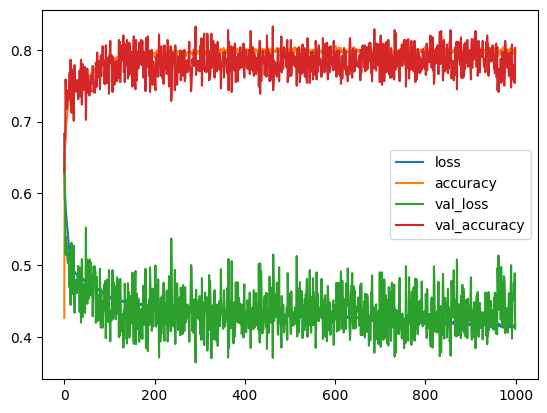

In [281]:
loss_df.plot()

In [282]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print("loss :" , loss)
print("accuracy :", accuracy)

loss : 0.45481011271476746
accuracy : 0.7910000085830688


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [283]:
class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}

tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


In [287]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=["accuracy"])

In [288]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 32, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7663 - val_loss: 0.3803 - val_accuracy: 0.8225
Epoch 2/1000
225/225 [==============================] - 0s 931us/step - loss: 0.4770 - accuracy: 0.7703 - val_loss: 0.4530 - val_accuracy: 0.7788
Epoch 3/1000
225/225 [==============================] - 0s 907us/step - loss: 0.4709 - accuracy: 0.7732 - val_loss: 0.4408 - val_accuracy: 0.7912
Epoch 4/1000
225/225 [==============================] - 0s 908us/step - loss: 0.4750 - accuracy: 0.7708 - val_loss: 0.3703 - val_accuracy: 0.8375
Epoch 5/1000
225/225 [==============================] - 0s 911us/step - loss: 0.4673 - accuracy: 0.7792 - val_loss: 0.4408 - val_accuracy: 0.7962
Epoch 6/1000
225/225 [==============================] - 0s 904us/step - loss: 0.4727 - accuracy: 0.7739 - val_loss: 0.5792 - val_accuracy: 0.6913
Epoch 7/1000
225/225 [==============================] - 0s 903us/step - loss: 0.4647 - accuracy: 0.7732 - val_loss: 0.4088 - v

Epoch 57/1000
225/225 [==============================] - 0s 943us/step - loss: 0.4444 - accuracy: 0.7919 - val_loss: 0.4732 - val_accuracy: 0.7738
Epoch 58/1000
225/225 [==============================] - 0s 890us/step - loss: 0.4438 - accuracy: 0.7889 - val_loss: 0.4561 - val_accuracy: 0.7812
Epoch 59/1000
225/225 [==============================] - 0s 910us/step - loss: 0.4425 - accuracy: 0.7894 - val_loss: 0.5034 - val_accuracy: 0.7500
Epoch 60/1000
225/225 [==============================] - 0s 903us/step - loss: 0.4435 - accuracy: 0.7956 - val_loss: 0.4174 - val_accuracy: 0.8012
Epoch 61/1000
225/225 [==============================] - 0s 947us/step - loss: 0.4425 - accuracy: 0.7865 - val_loss: 0.4620 - val_accuracy: 0.7738
Epoch 62/1000
225/225 [==============================] - 0s 899us/step - loss: 0.4451 - accuracy: 0.7879 - val_loss: 0.4658 - val_accuracy: 0.7638
Epoch 63/1000
225/225 [==============================] - 0s 895us/step - loss: 0.4438 - accuracy: 0.7915 - val_loss: 0

225/225 [==============================] - 0s 990us/step - loss: 0.4338 - accuracy: 0.7924 - val_loss: 0.4249 - val_accuracy: 0.8075
Epoch 113/1000
225/225 [==============================] - 0s 886us/step - loss: 0.4312 - accuracy: 0.7964 - val_loss: 0.4300 - val_accuracy: 0.8100
Epoch 114/1000
225/225 [==============================] - 0s 978us/step - loss: 0.4337 - accuracy: 0.7982 - val_loss: 0.4567 - val_accuracy: 0.7738
Epoch 115/1000
225/225 [==============================] - 0s 901us/step - loss: 0.4329 - accuracy: 0.7908 - val_loss: 0.4428 - val_accuracy: 0.7862
Epoch 116/1000
225/225 [==============================] - 0s 927us/step - loss: 0.4323 - accuracy: 0.7926 - val_loss: 0.4567 - val_accuracy: 0.7800
Epoch 117/1000
225/225 [==============================] - 0s 954us/step - loss: 0.4334 - accuracy: 0.7964 - val_loss: 0.4180 - val_accuracy: 0.8075
Epoch 118/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7964 - val_loss: 0.5763 - va

225/225 [==============================] - 0s 928us/step - loss: 0.4209 - accuracy: 0.7953 - val_loss: 0.4413 - val_accuracy: 0.7950
Epoch 168/1000
225/225 [==============================] - 0s 982us/step - loss: 0.4227 - accuracy: 0.7968 - val_loss: 0.4309 - val_accuracy: 0.8025
Epoch 169/1000
225/225 [==============================] - 0s 899us/step - loss: 0.4284 - accuracy: 0.7957 - val_loss: 0.4330 - val_accuracy: 0.8100
Epoch 170/1000
225/225 [==============================] - 0s 888us/step - loss: 0.4306 - accuracy: 0.7922 - val_loss: 0.4501 - val_accuracy: 0.7950
Epoch 171/1000
225/225 [==============================] - 0s 967us/step - loss: 0.4230 - accuracy: 0.7993 - val_loss: 0.4111 - val_accuracy: 0.8075
Epoch 172/1000
225/225 [==============================] - 0s 937us/step - loss: 0.4238 - accuracy: 0.7917 - val_loss: 0.4886 - val_accuracy: 0.7563
Epoch 173/1000
225/225 [==============================] - 0s 907us/step - loss: 0.4248 - accuracy: 0.7942 - val_loss: 0.4287 - 

225/225 [==============================] - 0s 893us/step - loss: 0.4171 - accuracy: 0.7974 - val_loss: 0.4471 - val_accuracy: 0.7862
Epoch 223/1000
225/225 [==============================] - 0s 877us/step - loss: 0.4222 - accuracy: 0.7986 - val_loss: 0.4398 - val_accuracy: 0.7788
Epoch 224/1000
225/225 [==============================] - 0s 878us/step - loss: 0.4172 - accuracy: 0.8043 - val_loss: 0.5215 - val_accuracy: 0.7525
Epoch 225/1000
225/225 [==============================] - 0s 896us/step - loss: 0.4183 - accuracy: 0.7949 - val_loss: 0.4408 - val_accuracy: 0.7812
Epoch 226/1000
225/225 [==============================] - 0s 880us/step - loss: 0.4157 - accuracy: 0.8006 - val_loss: 0.5088 - val_accuracy: 0.7513
Epoch 227/1000
225/225 [==============================] - 0s 886us/step - loss: 0.4274 - accuracy: 0.8028 - val_loss: 0.5131 - val_accuracy: 0.7638
Epoch 228/1000
225/225 [==============================] - 0s 882us/step - loss: 0.4178 - accuracy: 0.7981 - val_loss: 0.4916 - 

225/225 [==============================] - 0s 886us/step - loss: 0.4172 - accuracy: 0.7956 - val_loss: 0.4437 - val_accuracy: 0.7713
Epoch 278/1000
225/225 [==============================] - 0s 855us/step - loss: 0.4137 - accuracy: 0.7954 - val_loss: 0.4538 - val_accuracy: 0.8012
Epoch 279/1000
225/225 [==============================] - 0s 888us/step - loss: 0.4134 - accuracy: 0.7997 - val_loss: 0.4656 - val_accuracy: 0.7688
Epoch 280/1000
225/225 [==============================] - 0s 981us/step - loss: 0.4120 - accuracy: 0.7983 - val_loss: 0.4515 - val_accuracy: 0.7937
Epoch 281/1000
225/225 [==============================] - 0s 868us/step - loss: 0.4120 - accuracy: 0.7982 - val_loss: 0.4418 - val_accuracy: 0.7825
Epoch 282/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4134 - accuracy: 0.8014 - val_loss: 0.5156 - val_accuracy: 0.7412
Epoch 283/1000
225/225 [==============================] - 0s 879us/step - loss: 0.4121 - accuracy: 0.8000 - val_loss: 0.5520 - 

225/225 [==============================] - 0s 982us/step - loss: 0.4090 - accuracy: 0.7996 - val_loss: 0.4580 - val_accuracy: 0.7800
Epoch 333/1000
225/225 [==============================] - 0s 888us/step - loss: 0.4103 - accuracy: 0.8018 - val_loss: 0.4718 - val_accuracy: 0.7650
Epoch 334/1000
225/225 [==============================] - 0s 877us/step - loss: 0.4094 - accuracy: 0.7965 - val_loss: 0.4905 - val_accuracy: 0.7600
Epoch 335/1000
225/225 [==============================] - 0s 878us/step - loss: 0.4105 - accuracy: 0.8032 - val_loss: 0.4675 - val_accuracy: 0.7812
Epoch 336/1000
225/225 [==============================] - 0s 878us/step - loss: 0.4084 - accuracy: 0.8026 - val_loss: 0.4196 - val_accuracy: 0.7975
Epoch 337/1000
225/225 [==============================] - 0s 887us/step - loss: 0.4066 - accuracy: 0.7967 - val_loss: 0.4368 - val_accuracy: 0.7800
Epoch 338/1000
225/225 [==============================] - 0s 868us/step - loss: 0.4051 - accuracy: 0.7983 - val_loss: 0.4497 - 

225/225 [==============================] - 0s 887us/step - loss: 0.4068 - accuracy: 0.7942 - val_loss: 0.4585 - val_accuracy: 0.7850
Epoch 388/1000
225/225 [==============================] - 0s 874us/step - loss: 0.4070 - accuracy: 0.7961 - val_loss: 0.4828 - val_accuracy: 0.7588
Epoch 389/1000
225/225 [==============================] - 0s 884us/step - loss: 0.4040 - accuracy: 0.8021 - val_loss: 0.4759 - val_accuracy: 0.7788
Epoch 390/1000
225/225 [==============================] - 0s 883us/step - loss: 0.4053 - accuracy: 0.7989 - val_loss: 0.4472 - val_accuracy: 0.7837
Epoch 391/1000
225/225 [==============================] - 0s 872us/step - loss: 0.4089 - accuracy: 0.7986 - val_loss: 0.4639 - val_accuracy: 0.7850
Epoch 392/1000
225/225 [==============================] - 0s 897us/step - loss: 0.4080 - accuracy: 0.7922 - val_loss: 0.4940 - val_accuracy: 0.7600
Epoch 393/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4092 - accuracy: 0.7989 - val_loss: 0.4986 - 

225/225 [==============================] - 0s 894us/step - loss: 0.4071 - accuracy: 0.8018 - val_loss: 0.4440 - val_accuracy: 0.7837
Epoch 443/1000
225/225 [==============================] - 0s 847us/step - loss: 0.4063 - accuracy: 0.7956 - val_loss: 0.4874 - val_accuracy: 0.7812
Epoch 444/1000
225/225 [==============================] - 0s 892us/step - loss: 0.4037 - accuracy: 0.8022 - val_loss: 0.5207 - val_accuracy: 0.7638
Epoch 445/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4123 - accuracy: 0.7936 - val_loss: 0.5106 - val_accuracy: 0.7325
Epoch 446/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4067 - accuracy: 0.7996 - val_loss: 0.4662 - val_accuracy: 0.7862
Epoch 447/1000
225/225 [==============================] - 0s 927us/step - loss: 0.4043 - accuracy: 0.7994 - val_loss: 0.4553 - val_accuracy: 0.7925
Epoch 448/1000
225/225 [==============================] - 0s 846us/step - loss: 0.4009 - accuracy: 0.8007 - val_loss: 0.4701 - 

225/225 [==============================] - 0s 911us/step - loss: 0.4073 - accuracy: 0.7972 - val_loss: 0.5134 - val_accuracy: 0.7575
Epoch 498/1000
225/225 [==============================] - 0s 983us/step - loss: 0.3998 - accuracy: 0.7953 - val_loss: 0.4508 - val_accuracy: 0.7850
Epoch 499/1000
225/225 [==============================] - 0s 892us/step - loss: 0.4015 - accuracy: 0.7993 - val_loss: 0.5125 - val_accuracy: 0.7475
Epoch 500/1000
225/225 [==============================] - 0s 889us/step - loss: 0.4060 - accuracy: 0.7976 - val_loss: 0.5047 - val_accuracy: 0.7738
Epoch 501/1000
225/225 [==============================] - 0s 890us/step - loss: 0.4046 - accuracy: 0.7979 - val_loss: 0.4667 - val_accuracy: 0.7725
Epoch 502/1000
225/225 [==============================] - 0s 888us/step - loss: 0.4042 - accuracy: 0.8001 - val_loss: 0.4598 - val_accuracy: 0.7887
Epoch 503/1000
225/225 [==============================] - 0s 880us/step - loss: 0.4067 - accuracy: 0.7976 - val_loss: 0.4663 - 

225/225 [==============================] - 0s 941us/step - loss: 0.4073 - accuracy: 0.7975 - val_loss: 0.5343 - val_accuracy: 0.7337
Epoch 553/1000
225/225 [==============================] - 0s 876us/step - loss: 0.4022 - accuracy: 0.7981 - val_loss: 0.5119 - val_accuracy: 0.7625
Epoch 554/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4011 - accuracy: 0.8007 - val_loss: 0.5876 - val_accuracy: 0.7138
Epoch 555/1000
225/225 [==============================] - 0s 886us/step - loss: 0.4053 - accuracy: 0.7974 - val_loss: 0.4663 - val_accuracy: 0.7912
Epoch 556/1000
225/225 [==============================] - 0s 894us/step - loss: 0.3979 - accuracy: 0.8036 - val_loss: 0.4875 - val_accuracy: 0.7675
Epoch 557/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4020 - accuracy: 0.8003 - val_loss: 0.5602 - val_accuracy: 0.7350
Epoch 558/1000
225/225 [==============================] - 0s 890us/step - loss: 0.4003 - accuracy: 0.7981 - val_loss: 0.4575 - 

225/225 [==============================] - 0s 885us/step - loss: 0.3987 - accuracy: 0.7994 - val_loss: 0.4873 - val_accuracy: 0.7875
Epoch 608/1000
225/225 [==============================] - 0s 885us/step - loss: 0.3989 - accuracy: 0.7971 - val_loss: 0.5094 - val_accuracy: 0.7725
Epoch 609/1000
225/225 [==============================] - 0s 897us/step - loss: 0.3960 - accuracy: 0.7979 - val_loss: 0.5592 - val_accuracy: 0.7513
Epoch 610/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4033 - accuracy: 0.7962 - val_loss: 0.4840 - val_accuracy: 0.7688
Epoch 611/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3998 - accuracy: 0.8004 - val_loss: 0.4964 - val_accuracy: 0.7625
Epoch 612/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4049 - accuracy: 0.7976 - val_loss: 0.5055 - val_accuracy: 0.7588
Epoch 613/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4002 - accuracy: 0.8021 - val_loss: 0.5227 - 

225/225 [==============================] - 0s 920us/step - loss: 0.3993 - accuracy: 0.7985 - val_loss: 0.5266 - val_accuracy: 0.7425
Epoch 663/1000
225/225 [==============================] - 0s 872us/step - loss: 0.3993 - accuracy: 0.7976 - val_loss: 0.4959 - val_accuracy: 0.7812
Epoch 664/1000
225/225 [==============================] - 0s 923us/step - loss: 0.3992 - accuracy: 0.7996 - val_loss: 0.4754 - val_accuracy: 0.7900
Epoch 665/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.7978 - val_loss: 0.4660 - val_accuracy: 0.7912
Epoch 666/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.7962 - val_loss: 0.5041 - val_accuracy: 0.7625
Epoch 667/1000
225/225 [==============================] - 0s 898us/step - loss: 0.3965 - accuracy: 0.8025 - val_loss: 0.4891 - val_accuracy: 0.7775
Epoch 668/1000
225/225 [==============================] - 0s 901us/step - loss: 0.3978 - accuracy: 0.8003 - val_loss: 0.5313 - val_

225/225 [==============================] - 0s 876us/step - loss: 0.4079 - accuracy: 0.7947 - val_loss: 0.4250 - val_accuracy: 0.8163
Epoch 718/1000
225/225 [==============================] - 0s 888us/step - loss: 0.3996 - accuracy: 0.8003 - val_loss: 0.5218 - val_accuracy: 0.7600
Epoch 719/1000
225/225 [==============================] - 0s 899us/step - loss: 0.3966 - accuracy: 0.7993 - val_loss: 0.4396 - val_accuracy: 0.8112
Epoch 720/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3981 - accuracy: 0.8037 - val_loss: 0.5745 - val_accuracy: 0.7312
Epoch 721/1000
225/225 [==============================] - 0s 963us/step - loss: 0.3937 - accuracy: 0.8044 - val_loss: 0.4802 - val_accuracy: 0.7788
Epoch 722/1000
225/225 [==============================] - 0s 948us/step - loss: 0.4006 - accuracy: 0.7994 - val_loss: 0.5245 - val_accuracy: 0.7500
Epoch 723/1000
225/225 [==============================] - 0s 906us/step - loss: 0.3991 - accuracy: 0.8004 - val_loss: 0.4834 - 

225/225 [==============================] - 0s 890us/step - loss: 0.3956 - accuracy: 0.8032 - val_loss: 0.4819 - val_accuracy: 0.7825
Epoch 773/1000
225/225 [==============================] - 0s 905us/step - loss: 0.3959 - accuracy: 0.8062 - val_loss: 0.5153 - val_accuracy: 0.7550
Epoch 774/1000
225/225 [==============================] - 0s 891us/step - loss: 0.3927 - accuracy: 0.8015 - val_loss: 0.4786 - val_accuracy: 0.7850
Epoch 775/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3964 - accuracy: 0.8004 - val_loss: 0.5038 - val_accuracy: 0.7500
Epoch 776/1000
225/225 [==============================] - 0s 918us/step - loss: 0.3974 - accuracy: 0.8044 - val_loss: 0.5100 - val_accuracy: 0.7575
Epoch 777/1000
225/225 [==============================] - 0s 989us/step - loss: 0.3971 - accuracy: 0.8004 - val_loss: 0.4719 - val_accuracy: 0.7850
Epoch 778/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3969 - accuracy: 0.7967 - val_loss: 0.5007 - 

225/225 [==============================] - 0s 901us/step - loss: 0.3941 - accuracy: 0.8025 - val_loss: 0.5045 - val_accuracy: 0.7575
Epoch 828/1000
225/225 [==============================] - 0s 891us/step - loss: 0.3953 - accuracy: 0.8042 - val_loss: 0.4620 - val_accuracy: 0.7862
Epoch 829/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.7957 - val_loss: 0.4826 - val_accuracy: 0.7600
Epoch 830/1000
225/225 [==============================] - 0s 897us/step - loss: 0.4052 - accuracy: 0.8031 - val_loss: 0.5088 - val_accuracy: 0.7575
Epoch 831/1000
225/225 [==============================] - 0s 882us/step - loss: 0.3949 - accuracy: 0.8031 - val_loss: 0.5105 - val_accuracy: 0.7625
Epoch 832/1000
225/225 [==============================] - 0s 913us/step - loss: 0.3936 - accuracy: 0.8008 - val_loss: 0.4991 - val_accuracy: 0.7638
Epoch 833/1000
225/225 [==============================] - 0s 920us/step - loss: 0.3968 - accuracy: 0.8004 - val_loss: 0.4430 - va

225/225 [==============================] - 0s 914us/step - loss: 0.3931 - accuracy: 0.8014 - val_loss: 0.4363 - val_accuracy: 0.7925
Epoch 883/1000
225/225 [==============================] - 0s 895us/step - loss: 0.3940 - accuracy: 0.8058 - val_loss: 0.4960 - val_accuracy: 0.7513
Epoch 884/1000
225/225 [==============================] - 0s 888us/step - loss: 0.3912 - accuracy: 0.8001 - val_loss: 0.4609 - val_accuracy: 0.7800
Epoch 885/1000
225/225 [==============================] - 0s 887us/step - loss: 0.3897 - accuracy: 0.8025 - val_loss: 0.5327 - val_accuracy: 0.7262
Epoch 886/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8022 - val_loss: 0.5552 - val_accuracy: 0.7200
Epoch 887/1000
225/225 [==============================] - 0s 968us/step - loss: 0.3918 - accuracy: 0.8010 - val_loss: 0.4809 - val_accuracy: 0.7750
Epoch 888/1000
225/225 [==============================] - 0s 920us/step - loss: 0.3927 - accuracy: 0.8012 - val_loss: 0.4911 - va

225/225 [==============================] - 0s 927us/step - loss: 0.3896 - accuracy: 0.8014 - val_loss: 0.4789 - val_accuracy: 0.7663
Epoch 938/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.7990 - val_loss: 0.4701 - val_accuracy: 0.7912
Epoch 939/1000
225/225 [==============================] - 0s 920us/step - loss: 0.3938 - accuracy: 0.8067 - val_loss: 0.4936 - val_accuracy: 0.7663
Epoch 940/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8057 - val_loss: 0.4382 - val_accuracy: 0.8000
Epoch 941/1000
225/225 [==============================] - 0s 907us/step - loss: 0.3942 - accuracy: 0.8008 - val_loss: 0.5358 - val_accuracy: 0.7412
Epoch 942/1000
225/225 [==============================] - 0s 912us/step - loss: 0.3948 - accuracy: 0.8037 - val_loss: 0.4584 - val_accuracy: 0.7850
Epoch 943/1000
225/225 [==============================] - 0s 892us/step - loss: 0.3951 - accuracy: 0.8053 - val_loss: 0.4857 - val_

225/225 [==============================] - 0s 943us/step - loss: 0.3909 - accuracy: 0.8003 - val_loss: 0.5222 - val_accuracy: 0.7437
Epoch 993/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3902 - accuracy: 0.8035 - val_loss: 0.4584 - val_accuracy: 0.8062
Epoch 994/1000
225/225 [==============================] - 0s 965us/step - loss: 0.3916 - accuracy: 0.8024 - val_loss: 0.5310 - val_accuracy: 0.7387
Epoch 995/1000
225/225 [==============================] - 0s 970us/step - loss: 0.3958 - accuracy: 0.7996 - val_loss: 0.4949 - val_accuracy: 0.7688
Epoch 996/1000
225/225 [==============================] - 0s 958us/step - loss: 0.3947 - accuracy: 0.7972 - val_loss: 0.4878 - val_accuracy: 0.7800
Epoch 997/1000
225/225 [==============================] - 0s 887us/step - loss: 0.3920 - accuracy: 0.8031 - val_loss: 0.5023 - val_accuracy: 0.7563
Epoch 998/1000
225/225 [==============================] - 0s 922us/step - loss: 0.3933 - accuracy: 0.7985 - val_loss: 0.5828 - 

<AxesSubplot:>

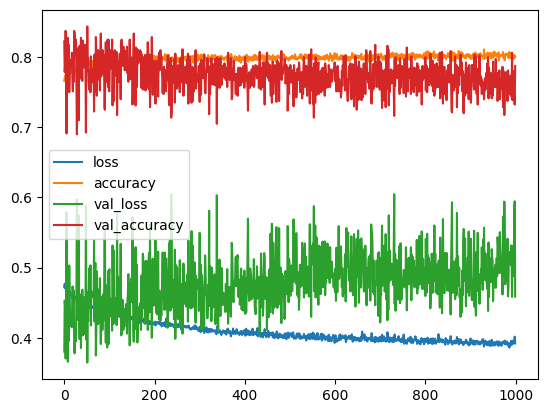

In [290]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [291]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5099230408668518
accuracy :  0.7879999876022339


In [292]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 646us/step
[[1295  298]
 [ 126  281]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.69      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.71      2000
weighted avg       0.82      0.79      0.80      2000



### Add Dropout Layer

In [289]:
from tensorflow.keras.layers import Dropout

In [293]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [294]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 1ms/step - loss: 0.5417 - accuracy: 0.7853 - val_loss: 0.4645 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 974us/step - loss: 0.5005 - accuracy: 0.7947 - val_loss: 0.4679 - val_accuracy: 0.8100
Epoch 3/1000
225/225 [==============================] - 0s 947us/step - loss: 0.4853 - accuracy: 0.7947 - val_loss: 0.4461 - val_accuracy: 0.8100
Epoch 4/1000
225/225 [==============================] - 0s 961us/step - loss: 0.4832 - accuracy: 0.7946 - val_loss: 0.4400 - val_accuracy: 0.8100
Epoch 5/1000
225/225 [==============================] - 0s 932us/step - loss: 0.4736 - accuracy: 0.7956 - val_loss: 0.4213 - val_accuracy: 0.8125
Epoch 6/1000
225/225 [==============================] - 0s 930us/step - loss: 0.4627 - accuracy: 0.7994 - val_loss: 0.4058 - val_accuracy: 0.8200
Epoch 7/1000
225/225 [==============================] - 0s 924us/step - loss: 0.4583 - accuracy: 0.8040 - val_loss: 0.3889 - v

225/225 [==============================] - 0s 887us/step - loss: 0.4284 - accuracy: 0.8193 - val_loss: 0.3537 - val_accuracy: 0.8500
Epoch 58/1000
225/225 [==============================] - 0s 929us/step - loss: 0.4180 - accuracy: 0.8232 - val_loss: 0.3538 - val_accuracy: 0.8562
Epoch 59/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4171 - accuracy: 0.8261 - val_loss: 0.3714 - val_accuracy: 0.8512
Epoch 60/1000
225/225 [==============================] - 0s 939us/step - loss: 0.4152 - accuracy: 0.8288 - val_loss: 0.3539 - val_accuracy: 0.8600
Epoch 61/1000
225/225 [==============================] - 0s 932us/step - loss: 0.4217 - accuracy: 0.8257 - val_loss: 0.3532 - val_accuracy: 0.8637
Epoch 62/1000
225/225 [==============================] - 0s 942us/step - loss: 0.4251 - accuracy: 0.8225 - val_loss: 0.3543 - val_accuracy: 0.8562
Epoch 63/1000
225/225 [==============================] - 0s 928us/step - loss: 0.4181 - accuracy: 0.8199 - val_loss: 0.3508 - val_ac

Epoch 113/1000
225/225 [==============================] - 0s 955us/step - loss: 0.4147 - accuracy: 0.8231 - val_loss: 0.3460 - val_accuracy: 0.8562
Epoch 114/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8221 - val_loss: 0.3504 - val_accuracy: 0.8525
Epoch 115/1000
225/225 [==============================] - 0s 992us/step - loss: 0.4139 - accuracy: 0.8289 - val_loss: 0.3467 - val_accuracy: 0.8625
Epoch 116/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8239 - val_loss: 0.3556 - val_accuracy: 0.8525
Epoch 117/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8265 - val_loss: 0.3556 - val_accuracy: 0.8550
Epoch 118/1000
225/225 [==============================] - 0s 928us/step - loss: 0.4188 - accuracy: 0.8247 - val_loss: 0.3434 - val_accuracy: 0.8587
Epoch 119/1000
225/225 [==============================] - 0s 915us/step - loss: 0.4114 - accuracy: 0.8307 - val_loss: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8204 - val_loss: 0.3487 - val_accuracy: 0.8500
Epoch 169/1000
225/225 [==============================] - 0s 971us/step - loss: 0.4212 - accuracy: 0.8200 - val_loss: 0.3638 - val_accuracy: 0.8350
Epoch 170/1000
225/225 [==============================] - 0s 951us/step - loss: 0.4083 - accuracy: 0.8219 - val_loss: 0.3487 - val_accuracy: 0.8500
Epoch 171/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8275 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 172/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8274 - val_loss: 0.3362 - val_accuracy: 0.8662
Epoch 173/1000
225/225 [==============================] - 0s 980us/step - loss: 0.4098 - accuracy: 0.8297 - val_loss: 0.3475 - val_accuracy: 0.8575
Epoch 174/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8293 - val_loss: 0.3467 - val_accu

Epoch 224/1000
225/225 [==============================] - 0s 944us/step - loss: 0.4140 - accuracy: 0.8253 - val_loss: 0.3539 - val_accuracy: 0.8487
Epoch 225/1000
225/225 [==============================] - 0s 891us/step - loss: 0.4153 - accuracy: 0.8240 - val_loss: 0.3490 - val_accuracy: 0.8525
Epoch 226/1000
225/225 [==============================] - 0s 980us/step - loss: 0.4104 - accuracy: 0.8254 - val_loss: 0.3505 - val_accuracy: 0.8612
Epoch 227/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8265 - val_loss: 0.3451 - val_accuracy: 0.8612
Epoch 228/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8251 - val_loss: 0.3346 - val_accuracy: 0.8612
Epoch 229/1000
225/225 [==============================] - 0s 912us/step - loss: 0.4112 - accuracy: 0.8239 - val_loss: 0.3448 - val_accuracy: 0.8438
Epoch 230/1000
225/225 [==============================] - 0s 907us/step - loss: 0.4176 - accuracy: 0.8228 - val_loss

225/225 [==============================] - 0s 969us/step - loss: 0.4126 - accuracy: 0.8246 - val_loss: 0.3515 - val_accuracy: 0.8600
Epoch 280/1000
225/225 [==============================] - 0s 926us/step - loss: 0.4183 - accuracy: 0.8218 - val_loss: 0.3511 - val_accuracy: 0.8550
Epoch 281/1000
225/225 [==============================] - 0s 926us/step - loss: 0.4110 - accuracy: 0.8275 - val_loss: 0.3367 - val_accuracy: 0.8587
Epoch 282/1000
225/225 [==============================] - 0s 948us/step - loss: 0.4101 - accuracy: 0.8278 - val_loss: 0.3367 - val_accuracy: 0.8600
Epoch 283/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4139 - accuracy: 0.8251 - val_loss: 0.3336 - val_accuracy: 0.8587
Epoch 284/1000
225/225 [==============================] - 0s 929us/step - loss: 0.4130 - accuracy: 0.8279 - val_loss: 0.3459 - val_accuracy: 0.8550
Epoch 285/1000
225/225 [==============================] - 0s 924us/step - loss: 0.4137 - accuracy: 0.8294 - val_loss: 0.3566 - 

Epoch 335/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8276 - val_loss: 0.3435 - val_accuracy: 0.8562
Epoch 336/1000
225/225 [==============================] - 0s 922us/step - loss: 0.4093 - accuracy: 0.8268 - val_loss: 0.3459 - val_accuracy: 0.8512
Epoch 337/1000
225/225 [==============================] - 0s 932us/step - loss: 0.4097 - accuracy: 0.8267 - val_loss: 0.3379 - val_accuracy: 0.8575
Epoch 338/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8268 - val_loss: 0.3551 - val_accuracy: 0.8450
Epoch 339/1000
225/225 [==============================] - 0s 950us/step - loss: 0.4104 - accuracy: 0.8272 - val_loss: 0.3604 - val_accuracy: 0.8475
Epoch 340/1000
225/225 [==============================] - 0s 919us/step - loss: 0.4137 - accuracy: 0.8283 - val_loss: 0.3457 - val_accuracy: 0.8587
Epoch 341/1000
225/225 [==============================] - 0s 921us/step - loss: 0.4074 - accuracy: 0.8261 - val_loss

225/225 [==============================] - 0s 987us/step - loss: 0.4055 - accuracy: 0.8265 - val_loss: 0.3408 - val_accuracy: 0.8575
Epoch 391/1000
225/225 [==============================] - 0s 965us/step - loss: 0.4034 - accuracy: 0.8310 - val_loss: 0.3387 - val_accuracy: 0.8537
Epoch 392/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8272 - val_loss: 0.3437 - val_accuracy: 0.8562
Epoch 393/1000
225/225 [==============================] - 0s 1000us/step - loss: 0.4113 - accuracy: 0.8261 - val_loss: 0.3430 - val_accuracy: 0.8500
Epoch 394/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8256 - val_loss: 0.3327 - val_accuracy: 0.8587
Epoch 395/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8236 - val_loss: 0.3496 - val_accuracy: 0.8462
Epoch 396/1000
225/225 [==============================] - 0s 996us/step - loss: 0.4076 - accuracy: 0.8286 - val_loss: 0.3421 - val_a

Epoch 446/1000
225/225 [==============================] - 0s 945us/step - loss: 0.4132 - accuracy: 0.8260 - val_loss: 0.3354 - val_accuracy: 0.8600
Epoch 447/1000
225/225 [==============================] - 0s 906us/step - loss: 0.4079 - accuracy: 0.8272 - val_loss: 0.3358 - val_accuracy: 0.8625
Epoch 448/1000
225/225 [==============================] - 0s 902us/step - loss: 0.4152 - accuracy: 0.8246 - val_loss: 0.3341 - val_accuracy: 0.8612
Epoch 449/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8275 - val_loss: 0.3412 - val_accuracy: 0.8612
Epoch 450/1000
225/225 [==============================] - 0s 907us/step - loss: 0.4120 - accuracy: 0.8261 - val_loss: 0.3462 - val_accuracy: 0.8475
Epoch 451/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8263 - val_loss: 0.3341 - val_accuracy: 0.8637
Epoch 452/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8300 - val_loss: 

Epoch 502/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8256 - val_loss: 0.3303 - val_accuracy: 0.8650
Epoch 503/1000
225/225 [==============================] - 0s 975us/step - loss: 0.4135 - accuracy: 0.8267 - val_loss: 0.3379 - val_accuracy: 0.8550
Epoch 504/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8300 - val_loss: 0.3292 - val_accuracy: 0.8625
Epoch 505/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8244 - val_loss: 0.3248 - val_accuracy: 0.8687
Epoch 506/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8281 - val_loss: 0.3359 - val_accuracy: 0.8575
Epoch 507/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8249 - val_loss: 0.3355 - val_accuracy: 0.8550
Epoch 508/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8265 - val_loss: 0.3423

225/225 [==============================] - 0s 985us/step - loss: 0.4112 - accuracy: 0.8225 - val_loss: 0.3378 - val_accuracy: 0.8600
Epoch 558/1000
225/225 [==============================] - 0s 935us/step - loss: 0.4087 - accuracy: 0.8264 - val_loss: 0.3393 - val_accuracy: 0.8550
Epoch 559/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8326 - val_loss: 0.3355 - val_accuracy: 0.8575
Epoch 560/1000
225/225 [==============================] - 0s 945us/step - loss: 0.4079 - accuracy: 0.8253 - val_loss: 0.3448 - val_accuracy: 0.8512
Epoch 561/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4049 - accuracy: 0.8293 - val_loss: 0.3350 - val_accuracy: 0.8587
Epoch 562/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8279 - val_loss: 0.3420 - val_accuracy: 0.8562
Epoch 563/1000
225/225 [==============================] - 0s 945us/step - loss: 0.4069 - accuracy: 0.8278 - val_loss: 0.3357 - val_

225/225 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8269 - val_loss: 0.3365 - val_accuracy: 0.8612
Epoch 613/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8229 - val_loss: 0.3354 - val_accuracy: 0.8575
Epoch 614/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8285 - val_loss: 0.3432 - val_accuracy: 0.8637
Epoch 615/1000
225/225 [==============================] - 0s 972us/step - loss: 0.4159 - accuracy: 0.8221 - val_loss: 0.3415 - val_accuracy: 0.8512
Epoch 616/1000
225/225 [==============================] - 0s 987us/step - loss: 0.4101 - accuracy: 0.8239 - val_loss: 0.3426 - val_accuracy: 0.8500
Epoch 617/1000
225/225 [==============================] - 0s 898us/step - loss: 0.4098 - accuracy: 0.8275 - val_loss: 0.3506 - val_accuracy: 0.8550
Epoch 618/1000
225/225 [==============================] - 0s 902us/step - loss: 0.4119 - accuracy: 0.8257 - val_loss: 0.3427 - val_ac

225/225 [==============================] - 0s 904us/step - loss: 0.4056 - accuracy: 0.8274 - val_loss: 0.3308 - val_accuracy: 0.8625
Epoch 668/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4037 - accuracy: 0.8306 - val_loss: 0.3346 - val_accuracy: 0.8650
Epoch 669/1000
225/225 [==============================] - 0s 893us/step - loss: 0.4095 - accuracy: 0.8254 - val_loss: 0.3411 - val_accuracy: 0.8575
Epoch 670/1000
225/225 [==============================] - 0s 924us/step - loss: 0.4031 - accuracy: 0.8268 - val_loss: 0.3377 - val_accuracy: 0.8550
Epoch 671/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4113 - accuracy: 0.8253 - val_loss: 0.3338 - val_accuracy: 0.8587
Epoch 672/1000
225/225 [==============================] - 0s 994us/step - loss: 0.4084 - accuracy: 0.8279 - val_loss: 0.3364 - val_accuracy: 0.8625
Epoch 673/1000
225/225 [==============================] - 0s 886us/step - loss: 0.4046 - accuracy: 0.8275 - val_loss: 0.3414 - 

225/225 [==============================] - 0s 937us/step - loss: 0.4057 - accuracy: 0.8292 - val_loss: 0.3483 - val_accuracy: 0.8550
Epoch 723/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8307 - val_loss: 0.3436 - val_accuracy: 0.8512
Epoch 724/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8315 - val_loss: 0.3406 - val_accuracy: 0.8612
Epoch 725/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8297 - val_loss: 0.3375 - val_accuracy: 0.8575
Epoch 726/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8235 - val_loss: 0.3414 - val_accuracy: 0.8550
Epoch 727/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8244 - val_loss: 0.3363 - val_accuracy: 0.8612
Epoch 728/1000
225/225 [==============================] - 0s 920us/step - loss: 0.4189 - accuracy: 0.8253 - val_loss: 0.3529 - val_accura

225/225 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8254 - val_loss: 0.3342 - val_accuracy: 0.8612
Epoch 778/1000
225/225 [==============================] - 0s 945us/step - loss: 0.4092 - accuracy: 0.8275 - val_loss: 0.3346 - val_accuracy: 0.8650
Epoch 779/1000
225/225 [==============================] - 0s 948us/step - loss: 0.4027 - accuracy: 0.8308 - val_loss: 0.3458 - val_accuracy: 0.8550
Epoch 780/1000
225/225 [==============================] - 0s 976us/step - loss: 0.4097 - accuracy: 0.8293 - val_loss: 0.3288 - val_accuracy: 0.8625
Epoch 781/1000
225/225 [==============================] - 0s 921us/step - loss: 0.4060 - accuracy: 0.8267 - val_loss: 0.3398 - val_accuracy: 0.8550
Epoch 782/1000
225/225 [==============================] - 0s 937us/step - loss: 0.4080 - accuracy: 0.8250 - val_loss: 0.3459 - val_accuracy: 0.8587
Epoch 783/1000
225/225 [==============================] - 0s 942us/step - loss: 0.4128 - accuracy: 0.8247 - val_loss: 0.3272 - va

225/225 [==============================] - 0s 926us/step - loss: 0.4136 - accuracy: 0.8275 - val_loss: 0.3438 - val_accuracy: 0.8637
Epoch 833/1000
225/225 [==============================] - 0s 932us/step - loss: 0.4115 - accuracy: 0.8233 - val_loss: 0.3396 - val_accuracy: 0.8600
Epoch 834/1000
225/225 [==============================] - 0s 907us/step - loss: 0.4164 - accuracy: 0.8242 - val_loss: 0.3318 - val_accuracy: 0.8562
Epoch 835/1000
225/225 [==============================] - 0s 945us/step - loss: 0.4029 - accuracy: 0.8260 - val_loss: 0.3362 - val_accuracy: 0.8575
Epoch 836/1000
225/225 [==============================] - 0s 920us/step - loss: 0.4050 - accuracy: 0.8274 - val_loss: 0.3346 - val_accuracy: 0.8575
Epoch 837/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4103 - accuracy: 0.8272 - val_loss: 0.3447 - val_accuracy: 0.8537
Epoch 838/1000
225/225 [==============================] - 0s 940us/step - loss: 0.4077 - accuracy: 0.8257 - val_loss: 0.3294 - 

225/225 [==============================] - 0s 934us/step - loss: 0.4125 - accuracy: 0.8249 - val_loss: 0.3438 - val_accuracy: 0.8562
Epoch 888/1000
225/225 [==============================] - 0s 929us/step - loss: 0.4012 - accuracy: 0.8303 - val_loss: 0.3272 - val_accuracy: 0.8600
Epoch 889/1000
225/225 [==============================] - 0s 907us/step - loss: 0.3984 - accuracy: 0.8317 - val_loss: 0.3320 - val_accuracy: 0.8550
Epoch 890/1000
225/225 [==============================] - 0s 938us/step - loss: 0.4036 - accuracy: 0.8283 - val_loss: 0.3280 - val_accuracy: 0.8625
Epoch 891/1000
225/225 [==============================] - 0s 913us/step - loss: 0.4132 - accuracy: 0.8247 - val_loss: 0.3332 - val_accuracy: 0.8587
Epoch 892/1000
225/225 [==============================] - 0s 930us/step - loss: 0.4070 - accuracy: 0.8274 - val_loss: 0.3277 - val_accuracy: 0.8587
Epoch 893/1000
225/225 [==============================] - 0s 906us/step - loss: 0.4116 - accuracy: 0.8229 - val_loss: 0.3333 - 

Epoch 943/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8271 - val_loss: 0.3508 - val_accuracy: 0.8587
Epoch 944/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8274 - val_loss: 0.3455 - val_accuracy: 0.8562
Epoch 945/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8244 - val_loss: 0.3376 - val_accuracy: 0.8575
Epoch 946/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8310 - val_loss: 0.3355 - val_accuracy: 0.8575
Epoch 947/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8286 - val_loss: 0.3405 - val_accuracy: 0.8575
Epoch 948/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8297 - val_loss: 0.3412 - val_accuracy: 0.8612
Epoch 949/1000
225/225 [==============================] - 0s 958us/step - loss: 0.4083 - accuracy: 0.8279 - val_loss: 0.3382

Epoch 999/1000
225/225 [==============================] - 0s 896us/step - loss: 0.4035 - accuracy: 0.8285 - val_loss: 0.3395 - val_accuracy: 0.8537
Epoch 1000/1000
225/225 [==============================] - 0s 894us/step - loss: 0.4086 - accuracy: 0.8276 - val_loss: 0.3403 - val_accuracy: 0.8600


<AxesSubplot:>

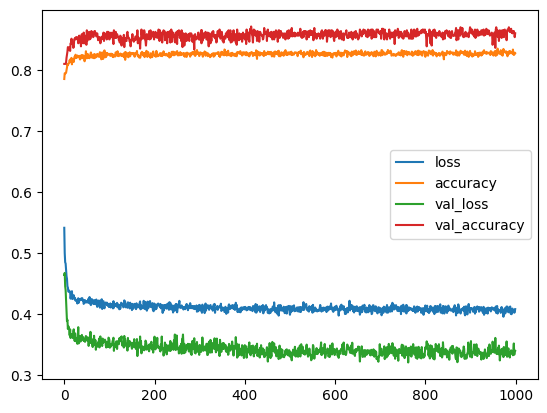

In [295]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [296]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3552801311016083
accuracy :  0.8500000238418579


In [297]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 675us/step
[[1581   12]
 [ 288  119]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1593
           1       0.91      0.29      0.44       407

    accuracy                           0.85      2000
   macro avg       0.88      0.64      0.68      2000
weighted avg       0.86      0.85      0.82      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [298]:
from tensorflow.keras.callbacks import EarlyStopping

In [299]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [300]:
early_stop = EarlyStopping(monitor = "val_loss",
                           mode = "min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [301]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7947 - val_loss: 0.4632 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 879us/step - loss: 0.4669 - accuracy: 0.7964 - val_loss: 0.4460 - val_accuracy: 0.8100
Epoch 3/1000
225/225 [==============================] - 0s 864us/step - loss: 0.4542 - accuracy: 0.7989 - val_loss: 0.4381 - val_accuracy: 0.8138
Epoch 4/1000
225/225 [==============================] - 0s 867us/step - loss: 0.4458 - accuracy: 0.8010 - val_loss: 0.4332 - val_accuracy: 0.8125
Epoch 5/1000
225/225 [==============================] - 0s 875us/step - loss: 0.4410 - accuracy: 0.8039 - val_loss: 0.4262 - val_accuracy: 0.8188
Epoch 6/1000
225/225 [==============================] - 0s 885us/step - loss: 0.4366 - accuracy: 0.8039 - val_loss: 0.4235 - val_accuracy: 0.8175
Epoch 7/1000
225/225 [==============================] - 0s 877us/step - loss: 0.4332 - accuracy: 0.8083 - val_loss: 0.4207 - v

Epoch 57/1000
225/225 [==============================] - 0s 868us/step - loss: 0.3421 - accuracy: 0.8617 - val_loss: 0.3233 - val_accuracy: 0.8662
Epoch 58/1000
225/225 [==============================] - 0s 927us/step - loss: 0.3412 - accuracy: 0.8610 - val_loss: 0.3177 - val_accuracy: 0.8662
Epoch 59/1000
225/225 [==============================] - 0s 910us/step - loss: 0.3393 - accuracy: 0.8597 - val_loss: 0.3224 - val_accuracy: 0.8650
Epoch 60/1000
225/225 [==============================] - 0s 906us/step - loss: 0.3408 - accuracy: 0.8614 - val_loss: 0.3174 - val_accuracy: 0.8650
Epoch 61/1000
225/225 [==============================] - 0s 871us/step - loss: 0.3392 - accuracy: 0.8617 - val_loss: 0.3189 - val_accuracy: 0.8637
Epoch 62/1000
225/225 [==============================] - 0s 903us/step - loss: 0.3421 - accuracy: 0.8611 - val_loss: 0.3160 - val_accuracy: 0.8725
Epoch 63/1000
225/225 [==============================] - 0s 892us/step - loss: 0.3403 - accuracy: 0.8611 - val_loss: 0

#### Monitor the "val_recall" as metric

In [302]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [303]:
early_stop = EarlyStopping(monitor = "val_recall",
                           mode = "max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [304]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.6817 - val_loss: 0.4772 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 880us/step - loss: 0.4834 - accuracy: 0.7947 - val_loss: 0.4649 - val_accuracy: 0.8075
Epoch 3/1000
225/225 [==============================] - 0s 862us/step - loss: 0.4685 - accuracy: 0.7978 - val_loss: 0.4500 - val_accuracy: 0.8100
Epoch 4/1000
225/225 [==============================] - 0s 905us/step - loss: 0.4509 - accuracy: 0.8079 - val_loss: 0.4414 - val_accuracy: 0.8138
Epoch 5/1000
225/225 [==============================] - 0s 856us/step - loss: 0.4412 - accuracy: 0.8103 - val_loss: 0.4275 - val_accuracy: 0.8275
Epoch 6/1000
225/225 [==============================] - 0s 896us/step - loss: 0.4353 - accuracy: 0.8129 - val_loss: 0.4234 - val_accuracy: 0.8275
Epoch 7/1000
225/225 [==============================] - 0s 886us/step - loss: 0.4312 - accuracy: 0.8174 - val_loss: 0.4198 - v

225/225 [==============================] - 0s 983us/step - loss: 0.3762 - accuracy: 0.8426 - val_loss: 0.3516 - val_accuracy: 0.8625
Epoch 23/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3719 - accuracy: 0.8432 - val_loss: 0.3462 - val_accuracy: 0.8587
Epoch 24/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8465 - val_loss: 0.3436 - val_accuracy: 0.8625
Epoch 25/1000
225/225 [==============================] - 0s 789us/step - loss: 0.3660 - accuracy: 0.8468 - val_loss: 0.3381 - val_accuracy: 0.8675
Epoch 26/1000
225/225 [==============================] - 0s 795us/step - loss: 0.3629 - accuracy: 0.8489 - val_loss: 0.3330 - val_accuracy: 0.8637
Epoch 27/1000
225/225 [==============================] - 0s 892us/step - loss: 0.3608 - accuracy: 0.8511 - val_loss: 0.3314 - val_accuracy: 0.8675
Epoch 28/1000
225/225 [==============================] - 0s 926us/step - loss: 0.3582 - accuracy: 0.8519 - val_loss: 0.3297 - val_accu

225/225 [==============================] - 0s 848us/step - loss: 0.3459 - accuracy: 0.8569 - val_loss: 0.3206 - val_accuracy: 0.8687
Epoch 45/1000
225/225 [==============================] - 0s 842us/step - loss: 0.3458 - accuracy: 0.8575 - val_loss: 0.3221 - val_accuracy: 0.8687
Epoch 46/1000
225/225 [==============================] - 0s 865us/step - loss: 0.3448 - accuracy: 0.8589 - val_loss: 0.3194 - val_accuracy: 0.8700
Epoch 47/1000
225/225 [==============================] - 0s 831us/step - loss: 0.3438 - accuracy: 0.8599 - val_loss: 0.3187 - val_accuracy: 0.8650
Epoch 48/1000
225/225 [==============================] - 0s 885us/step - loss: 0.3443 - accuracy: 0.8586 - val_loss: 0.3205 - val_accuracy: 0.8712
Epoch 49/1000
225/225 [==============================] - 0s 885us/step - loss: 0.3428 - accuracy: 0.8597 - val_loss: 0.3363 - val_accuracy: 0.8637
Epoch 50/1000
225/225 [==============================] - 0s 937us/step - loss: 0.3445 - accuracy: 0.8612 - val_loss: 0.3269 - val_ac

225/225 [==============================] - 0s 825us/step - loss: 0.3382 - accuracy: 0.8585 - val_loss: 0.3213 - val_accuracy: 0.8662
Epoch 66/1000
225/225 [==============================] - 0s 845us/step - loss: 0.3376 - accuracy: 0.8622 - val_loss: 0.3203 - val_accuracy: 0.8763
Epoch 67/1000
225/225 [==============================] - 0s 817us/step - loss: 0.3375 - accuracy: 0.8608 - val_loss: 0.3159 - val_accuracy: 0.8800
Epoch 68/1000
225/225 [==============================] - 0s 834us/step - loss: 0.3379 - accuracy: 0.8617 - val_loss: 0.3218 - val_accuracy: 0.8763
Epoch 69/1000
225/225 [==============================] - 0s 894us/step - loss: 0.3366 - accuracy: 0.8621 - val_loss: 0.3193 - val_accuracy: 0.8737
Epoch 70/1000
225/225 [==============================] - 0s 857us/step - loss: 0.3368 - accuracy: 0.8608 - val_loss: 0.3194 - val_accuracy: 0.8725
Epoch 71/1000
225/225 [==============================] - 0s 989us/step - loss: 0.3350 - accuracy: 0.8617 - val_loss: 0.3191 - val_ac

225/225 [==============================] - 0s 839us/step - loss: 0.3331 - accuracy: 0.8629 - val_loss: 0.3179 - val_accuracy: 0.8712
Epoch 88/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3340 - accuracy: 0.8618 - val_loss: 0.3140 - val_accuracy: 0.8750
Epoch 89/1000
225/225 [==============================] - 0s 918us/step - loss: 0.3346 - accuracy: 0.8614 - val_loss: 0.3153 - val_accuracy: 0.8712
Epoch 90/1000
225/225 [==============================] - 0s 972us/step - loss: 0.3337 - accuracy: 0.8607 - val_loss: 0.3155 - val_accuracy: 0.8737
Epoch 91/1000
225/225 [==============================] - 0s 874us/step - loss: 0.3340 - accuracy: 0.8614 - val_loss: 0.3168 - val_accuracy: 0.8737
Epoch 92/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8624 - val_loss: 0.3177 - val_accuracy: 0.8750
Epoch 93/1000
225/225 [==============================] - 0s 876us/step - loss: 0.3320 - accuracy: 0.8646 - val_loss: 0.3166 - val_accu

225/225 [==============================] - 0s 866us/step - loss: 0.3332 - accuracy: 0.8637 - val_loss: 0.3224 - val_accuracy: 0.8687
Epoch 109/1000
225/225 [==============================] - 0s 992us/step - loss: 0.3324 - accuracy: 0.8633 - val_loss: 0.3139 - val_accuracy: 0.8775
Epoch 110/1000
225/225 [==============================] - 0s 968us/step - loss: 0.3307 - accuracy: 0.8647 - val_loss: 0.3217 - val_accuracy: 0.8763
Epoch 111/1000
225/225 [==============================] - 0s 918us/step - loss: 0.3323 - accuracy: 0.8615 - val_loss: 0.3201 - val_accuracy: 0.8813
Epoch 112/1000
225/225 [==============================] - 0s 866us/step - loss: 0.3314 - accuracy: 0.8637 - val_loss: 0.3196 - val_accuracy: 0.8687
Epoch 113/1000
225/225 [==============================] - 0s 880us/step - loss: 0.3307 - accuracy: 0.8644 - val_loss: 0.3174 - val_accuracy: 0.8763
Epoch 114/1000
225/225 [==============================] - 0s 903us/step - loss: 0.3307 - accuracy: 0.8644 - val_loss: 0.3160 - 

Epoch 130/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8611 - val_loss: 0.3124 - val_accuracy: 0.8700
Epoch 131/1000
225/225 [==============================] - 0s 859us/step - loss: 0.3313 - accuracy: 0.8646 - val_loss: 0.3139 - val_accuracy: 0.8737
Epoch 132/1000
225/225 [==============================] - 0s 843us/step - loss: 0.3298 - accuracy: 0.8629 - val_loss: 0.3212 - val_accuracy: 0.8675
Epoch 133/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3325 - accuracy: 0.8647 - val_loss: 0.3135 - val_accuracy: 0.8700
Epoch 134/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3307 - accuracy: 0.8637 - val_loss: 0.3132 - val_accuracy: 0.8700
Epoch 135/1000
225/225 [==============================] - 0s 921us/step - loss: 0.3299 - accuracy: 0.8647 - val_loss: 0.3164 - val_accuracy: 0.8725
Epoch 136/1000
225/225 [==============================] - 0s 873us/step - loss: 0.3292 - accuracy: 0.8636 - val_lo

225/225 [==============================] - 0s 850us/step - loss: 0.3291 - accuracy: 0.8635 - val_loss: 0.3139 - val_accuracy: 0.8750
Epoch 152/1000
225/225 [==============================] - 0s 931us/step - loss: 0.3309 - accuracy: 0.8618 - val_loss: 0.3222 - val_accuracy: 0.8737
Epoch 153/1000
225/225 [==============================] - 0s 894us/step - loss: 0.3289 - accuracy: 0.8661 - val_loss: 0.3149 - val_accuracy: 0.8775
Epoch 154/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3284 - accuracy: 0.8649 - val_loss: 0.3174 - val_accuracy: 0.8763
Epoch 155/1000
225/225 [==============================] - 0s 880us/step - loss: 0.3284 - accuracy: 0.8657 - val_loss: 0.3239 - val_accuracy: 0.8725
Epoch 156/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3292 - accuracy: 0.8654 - val_loss: 0.3137 - val_accuracy: 0.8725
Epoch 157/1000
225/225 [==============================] - 0s 856us/step - loss: 0.3292 - accuracy: 0.8643 - val_loss: 0.3132 - 

Epoch 173/1000
225/225 [==============================] - 0s 886us/step - loss: 0.3291 - accuracy: 0.8637 - val_loss: 0.3139 - val_accuracy: 0.8700
Epoch 174/1000
225/225 [==============================] - 0s 952us/step - loss: 0.3273 - accuracy: 0.8665 - val_loss: 0.3136 - val_accuracy: 0.8712
Epoch 175/1000
225/225 [==============================] - 0s 899us/step - loss: 0.3279 - accuracy: 0.8672 - val_loss: 0.3162 - val_accuracy: 0.8675
Epoch 176/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3280 - accuracy: 0.8669 - val_loss: 0.3187 - val_accuracy: 0.8737
Epoch 177/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3282 - accuracy: 0.8640 - val_loss: 0.3168 - val_accuracy: 0.8775
Epoch 178/1000
225/225 [==============================] - 0s 856us/step - loss: 0.3283 - accuracy: 0.8667 - val_loss: 0.3159 - val_accuracy: 0.8737
Epoch 179/1000
225/225 [==============================] - 0s 892us/step - loss: 0.3286 - accuracy: 0.8651 - val_

225/225 [==============================] - 0s 873us/step - loss: 0.3276 - accuracy: 0.8662 - val_loss: 0.3146 - val_accuracy: 0.8763
Epoch 195/1000
225/225 [==============================] - 0s 942us/step - loss: 0.3264 - accuracy: 0.8664 - val_loss: 0.3181 - val_accuracy: 0.8712
Epoch 196/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3263 - accuracy: 0.8660 - val_loss: 0.3172 - val_accuracy: 0.8675
Epoch 197/1000
225/225 [==============================] - 0s 837us/step - loss: 0.3258 - accuracy: 0.8674 - val_loss: 0.3176 - val_accuracy: 0.8737
Epoch 198/1000
225/225 [==============================] - 0s 876us/step - loss: 0.3267 - accuracy: 0.8679 - val_loss: 0.3168 - val_accuracy: 0.8725
Epoch 199/1000
225/225 [==============================] - 0s 945us/step - loss: 0.3266 - accuracy: 0.8669 - val_loss: 0.3145 - val_accuracy: 0.8687
Epoch 200/1000
225/225 [==============================] - 0s 975us/step - loss: 0.3283 - accuracy: 0.8661 - val_loss: 0.3157 - 

Epoch 216/1000
225/225 [==============================] - 0s 957us/step - loss: 0.3255 - accuracy: 0.8661 - val_loss: 0.3175 - val_accuracy: 0.8675
Epoch 217/1000
225/225 [==============================] - 0s 843us/step - loss: 0.3252 - accuracy: 0.8675 - val_loss: 0.3212 - val_accuracy: 0.8700
Epoch 218/1000
225/225 [==============================] - 0s 934us/step - loss: 0.3278 - accuracy: 0.8653 - val_loss: 0.3150 - val_accuracy: 0.8712
Epoch 219/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3253 - accuracy: 0.8681 - val_loss: 0.3182 - val_accuracy: 0.8750
Epoch 220/1000
225/225 [==============================] - 0s 886us/step - loss: 0.3261 - accuracy: 0.8644 - val_loss: 0.3167 - val_accuracy: 0.8750
Epoch 221/1000
225/225 [==============================] - 0s 805us/step - loss: 0.3252 - accuracy: 0.8661 - val_loss: 0.3201 - val_accuracy: 0.8737
Epoch 222/1000
225/225 [==============================] - 0s 847us/step - loss: 0.3247 - accuracy: 0.8669 - val_

225/225 [==============================] - 0s 992us/step - loss: 0.3261 - accuracy: 0.8697 - val_loss: 0.3173 - val_accuracy: 0.8763
Epoch 238/1000
225/225 [==============================] - 0s 859us/step - loss: 0.3251 - accuracy: 0.8676 - val_loss: 0.3281 - val_accuracy: 0.8662
Epoch 239/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3260 - accuracy: 0.8654 - val_loss: 0.3224 - val_accuracy: 0.8687
Epoch 240/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3255 - accuracy: 0.8676 - val_loss: 0.3168 - val_accuracy: 0.8775
Epoch 241/1000
225/225 [==============================] - 0s 958us/step - loss: 0.3262 - accuracy: 0.8657 - val_loss: 0.3161 - val_accuracy: 0.8750
Epoch 242/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3257 - accuracy: 0.8682 - val_loss: 0.3211 - val_accuracy: 0.8650
Epoch 243/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3245 - accuracy: 0.8707 - val_loss: 0.3190 - 

Epoch 259/1000
225/225 [==============================] - 0s 862us/step - loss: 0.3253 - accuracy: 0.8685 - val_loss: 0.3193 - val_accuracy: 0.8625
Epoch 260/1000
225/225 [==============================] - 0s 882us/step - loss: 0.3247 - accuracy: 0.8671 - val_loss: 0.3189 - val_accuracy: 0.8788
Epoch 261/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3247 - accuracy: 0.8675 - val_loss: 0.3223 - val_accuracy: 0.8725
Epoch 262/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3243 - accuracy: 0.8675 - val_loss: 0.3223 - val_accuracy: 0.8700
Epoch 263/1000
225/225 [==============================] - 0s 967us/step - loss: 0.3247 - accuracy: 0.8694 - val_loss: 0.3247 - val_accuracy: 0.8687
Epoch 264/1000
225/225 [==============================] - 0s 874us/step - loss: 0.3244 - accuracy: 0.8689 - val_loss: 0.3211 - val_accuracy: 0.8775
Epoch 265/1000
225/225 [==============================] - 0s 889us/step - loss: 0.3252 - accuracy: 0.8639 - val_

225/225 [==============================] - 0s 889us/step - loss: 0.3239 - accuracy: 0.8694 - val_loss: 0.3208 - val_accuracy: 0.8712
Epoch 281/1000
225/225 [==============================] - 0s 904us/step - loss: 0.3240 - accuracy: 0.8690 - val_loss: 0.3200 - val_accuracy: 0.8788
Epoch 282/1000
225/225 [==============================] - 0s 863us/step - loss: 0.3238 - accuracy: 0.8703 - val_loss: 0.3270 - val_accuracy: 0.8600
Epoch 283/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3239 - accuracy: 0.8678 - val_loss: 0.3259 - val_accuracy: 0.8725
Epoch 284/1000
225/225 [==============================] - 0s 846us/step - loss: 0.3245 - accuracy: 0.8693 - val_loss: 0.3181 - val_accuracy: 0.8737
Epoch 285/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3234 - accuracy: 0.8700 - val_loss: 0.3205 - val_accuracy: 0.8725
Epoch 286/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3252 - accuracy: 0.8685 - val_loss: 0.3198 - 

Epoch 302/1000
225/225 [==============================] - 0s 857us/step - loss: 0.3236 - accuracy: 0.8674 - val_loss: 0.3206 - val_accuracy: 0.8687
Epoch 303/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3240 - accuracy: 0.8662 - val_loss: 0.3188 - val_accuracy: 0.8725
Epoch 304/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3239 - accuracy: 0.8689 - val_loss: 0.3189 - val_accuracy: 0.8687
Epoch 305/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3241 - accuracy: 0.8682 - val_loss: 0.3265 - val_accuracy: 0.8637
Epoch 306/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3240 - accuracy: 0.8696 - val_loss: 0.3242 - val_accuracy: 0.8725
Epoch 307/1000
225/225 [==============================] - 0s 843us/step - loss: 0.3232 - accuracy: 0.8686 - val_loss: 0.3293 - val_accuracy: 0.8675
Epoch 308/1000
225/225 [==============================] - 0s 827us/step - loss: 0.3246 - accuracy: 0.8660 - val_

225/225 [==============================] - 0s 851us/step - loss: 0.3227 - accuracy: 0.8679 - val_loss: 0.3204 - val_accuracy: 0.8788
Epoch 324/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3241 - accuracy: 0.8678 - val_loss: 0.3254 - val_accuracy: 0.8725
Epoch 325/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3222 - accuracy: 0.8699 - val_loss: 0.3214 - val_accuracy: 0.8650
Epoch 326/1000
225/225 [==============================] - 0s 866us/step - loss: 0.3223 - accuracy: 0.8676 - val_loss: 0.3200 - val_accuracy: 0.8763
Epoch 327/1000
225/225 [==============================] - 0s 828us/step - loss: 0.3232 - accuracy: 0.8681 - val_loss: 0.3259 - val_accuracy: 0.8650
Epoch 328/1000
225/225 [==============================] - 0s 935us/step - loss: 0.3231 - accuracy: 0.8689 - val_loss: 0.3220 - val_accuracy: 0.8700
Epoch 329/1000
225/225 [==============================] - 0s 969us/step - loss: 0.3221 - accuracy: 0.8722 - val_loss: 0.3207 - 

Epoch 345/1000
225/225 [==============================] - 0s 885us/step - loss: 0.3226 - accuracy: 0.8683 - val_loss: 0.3236 - val_accuracy: 0.8750
Epoch 346/1000
225/225 [==============================] - 0s 909us/step - loss: 0.3229 - accuracy: 0.8689 - val_loss: 0.3218 - val_accuracy: 0.8737
Epoch 347/1000
225/225 [==============================] - 0s 877us/step - loss: 0.3222 - accuracy: 0.8704 - val_loss: 0.3193 - val_accuracy: 0.8750
Epoch 348/1000
225/225 [==============================] - 0s 830us/step - loss: 0.3208 - accuracy: 0.8699 - val_loss: 0.3272 - val_accuracy: 0.8637
Epoch 349/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3226 - accuracy: 0.8704 - val_loss: 0.3206 - val_accuracy: 0.8712
Epoch 350/1000
225/225 [==============================] - 0s 833us/step - loss: 0.3221 - accuracy: 0.8682 - val_loss: 0.3221 - val_accuracy: 0.8700
Epoch 351/1000
225/225 [==============================] - 0s 878us/step - loss: 0.3217 - accuracy: 0.8683 - val_

225/225 [==============================] - 0s 837us/step - loss: 0.3225 - accuracy: 0.8681 - val_loss: 0.3241 - val_accuracy: 0.8687
Epoch 367/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8696 - val_loss: 0.3210 - val_accuracy: 0.8650
Epoch 368/1000
225/225 [==============================] - 0s 932us/step - loss: 0.3216 - accuracy: 0.8672 - val_loss: 0.3204 - val_accuracy: 0.8788
Epoch 369/1000
225/225 [==============================] - 0s 866us/step - loss: 0.3214 - accuracy: 0.8697 - val_loss: 0.3234 - val_accuracy: 0.8750
Epoch 370/1000
225/225 [==============================] - 0s 857us/step - loss: 0.3211 - accuracy: 0.8683 - val_loss: 0.3216 - val_accuracy: 0.8725
Epoch 371/1000
225/225 [==============================] - 0s 920us/step - loss: 0.3223 - accuracy: 0.8667 - val_loss: 0.3234 - val_accuracy: 0.8775
Epoch 372/1000
225/225 [==============================] - 0s 860us/step - loss: 0.3205 - accuracy: 0.8689 - val_loss: 0.3331 - va

Epoch 388/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3225 - accuracy: 0.8671 - val_loss: 0.3265 - val_accuracy: 0.8687
Epoch 389/1000
225/225 [==============================] - 0s 832us/step - loss: 0.3202 - accuracy: 0.8685 - val_loss: 0.3227 - val_accuracy: 0.8775
Epoch 390/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3201 - accuracy: 0.8697 - val_loss: 0.3230 - val_accuracy: 0.8737
Epoch 391/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3216 - accuracy: 0.8676 - val_loss: 0.3238 - val_accuracy: 0.8763
Epoch 392/1000
225/225 [==============================] - 0s 894us/step - loss: 0.3221 - accuracy: 0.8694 - val_loss: 0.3247 - val_accuracy: 0.8737
Epoch 393/1000
225/225 [==============================] - 0s 842us/step - loss: 0.3206 - accuracy: 0.8667 - val_loss: 0.3206 - val_accuracy: 0.8712
Epoch 394/1000
225/225 [==============================] - 0s 844us/step - loss: 0.3211 - accuracy: 0.8690 - val_

225/225 [==============================] - 0s 854us/step - loss: 0.3207 - accuracy: 0.8686 - val_loss: 0.3260 - val_accuracy: 0.8687
Epoch 410/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3206 - accuracy: 0.8683 - val_loss: 0.3224 - val_accuracy: 0.8737
Epoch 411/1000
225/225 [==============================] - 0s 859us/step - loss: 0.3218 - accuracy: 0.8674 - val_loss: 0.3253 - val_accuracy: 0.8725
Epoch 412/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3205 - accuracy: 0.8701 - val_loss: 0.3241 - val_accuracy: 0.8737
Epoch 413/1000
225/225 [==============================] - 0s 834us/step - loss: 0.3205 - accuracy: 0.8681 - val_loss: 0.3229 - val_accuracy: 0.8763
Epoch 414/1000
225/225 [==============================] - 0s 881us/step - loss: 0.3210 - accuracy: 0.8694 - val_loss: 0.3264 - val_accuracy: 0.8687
Epoch 415/1000
225/225 [==============================] - 0s 847us/step - loss: 0.3198 - accuracy: 0.8686 - val_loss: 0.3318 - 

Epoch 431/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3220 - accuracy: 0.8674 - val_loss: 0.3246 - val_accuracy: 0.8700
Epoch 432/1000
225/225 [==============================] - 0s 863us/step - loss: 0.3200 - accuracy: 0.8693 - val_loss: 0.3275 - val_accuracy: 0.8700
Epoch 433/1000
225/225 [==============================] - 0s 860us/step - loss: 0.3209 - accuracy: 0.8699 - val_loss: 0.3262 - val_accuracy: 0.8763
Epoch 434/1000
225/225 [==============================] - 0s 825us/step - loss: 0.3209 - accuracy: 0.8679 - val_loss: 0.3265 - val_accuracy: 0.8737
Epoch 435/1000
225/225 [==============================] - 0s 809us/step - loss: 0.3195 - accuracy: 0.8706 - val_loss: 0.3294 - val_accuracy: 0.8737
Epoch 436/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3199 - accuracy: 0.8704 - val_loss: 0.3232 - val_accuracy: 0.8737
Epoch 437/1000
225/225 [==============================] - 0s 787us/step - loss: 0.3200 - accuracy: 0.8693 - val_

225/225 [==============================] - 0s 849us/step - loss: 0.3198 - accuracy: 0.8686 - val_loss: 0.3267 - val_accuracy: 0.8737
Epoch 453/1000
225/225 [==============================] - 0s 940us/step - loss: 0.3199 - accuracy: 0.8700 - val_loss: 0.3248 - val_accuracy: 0.8662
Epoch 454/1000
225/225 [==============================] - 0s 787us/step - loss: 0.3196 - accuracy: 0.8703 - val_loss: 0.3246 - val_accuracy: 0.8675
Epoch 455/1000
225/225 [==============================] - 0s 827us/step - loss: 0.3203 - accuracy: 0.8682 - val_loss: 0.3265 - val_accuracy: 0.8687
Epoch 456/1000
225/225 [==============================] - 0s 875us/step - loss: 0.3194 - accuracy: 0.8668 - val_loss: 0.3254 - val_accuracy: 0.8700
Epoch 457/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3190 - accuracy: 0.8679 - val_loss: 0.3268 - val_accuracy: 0.8750
Epoch 458/1000
225/225 [==============================] - 0s 854us/step - loss: 0.3208 - accuracy: 0.8668 - val_loss: 0.3258 - 

Epoch 474/1000
225/225 [==============================] - 0s 835us/step - loss: 0.3186 - accuracy: 0.8700 - val_loss: 0.3272 - val_accuracy: 0.8712
Epoch 475/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3198 - accuracy: 0.8696 - val_loss: 0.3223 - val_accuracy: 0.8700
Epoch 476/1000
225/225 [==============================] - 0s 845us/step - loss: 0.3199 - accuracy: 0.8686 - val_loss: 0.3250 - val_accuracy: 0.8687
Epoch 477/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3197 - accuracy: 0.8704 - val_loss: 0.3337 - val_accuracy: 0.8600
Epoch 478/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3193 - accuracy: 0.8686 - val_loss: 0.3261 - val_accuracy: 0.8700
Epoch 479/1000
225/225 [==============================] - 0s 896us/step - loss: 0.3197 - accuracy: 0.8694 - val_loss: 0.3283 - val_accuracy: 0.8725
Epoch 480/1000
225/225 [==============================] - 0s 846us/step - loss: 0.3190 - accuracy: 0.8701 - val_

225/225 [==============================] - 0s 859us/step - loss: 0.3199 - accuracy: 0.8700 - val_loss: 0.3271 - val_accuracy: 0.8700
Epoch 496/1000
225/225 [==============================] - 0s 822us/step - loss: 0.3192 - accuracy: 0.8703 - val_loss: 0.3292 - val_accuracy: 0.8650
Epoch 497/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3190 - accuracy: 0.8701 - val_loss: 0.3252 - val_accuracy: 0.8612
Epoch 498/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3187 - accuracy: 0.8696 - val_loss: 0.3275 - val_accuracy: 0.8700
Epoch 499/1000
225/225 [==============================] - 0s 859us/step - loss: 0.3187 - accuracy: 0.8708 - val_loss: 0.3278 - val_accuracy: 0.8750
Epoch 500/1000
225/225 [==============================] - 0s 949us/step - loss: 0.3184 - accuracy: 0.8679 - val_loss: 0.3267 - val_accuracy: 0.8750
Epoch 501/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3193 - accuracy: 0.8686 - val_loss: 0.3258 - 

Epoch 517/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3186 - accuracy: 0.8689 - val_loss: 0.3260 - val_accuracy: 0.8750
Epoch 518/1000
225/225 [==============================] - 0s 885us/step - loss: 0.3188 - accuracy: 0.8718 - val_loss: 0.3285 - val_accuracy: 0.8712
Epoch 519/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8701 - val_loss: 0.3258 - val_accuracy: 0.8725
Epoch 520/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3189 - accuracy: 0.8696 - val_loss: 0.3272 - val_accuracy: 0.8637
Epoch 521/1000
225/225 [==============================] - 0s 890us/step - loss: 0.3183 - accuracy: 0.8712 - val_loss: 0.3254 - val_accuracy: 0.8700
Epoch 522/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8715 - val_loss: 0.3265 - val_accuracy: 0.8687
Epoch 523/1000
225/225 [==============================] - 0s 923us/step - loss: 0.3187 - accuracy: 0.8683 - val_loss

225/225 [==============================] - 0s 880us/step - loss: 0.3183 - accuracy: 0.8714 - val_loss: 0.3294 - val_accuracy: 0.8625
Epoch 539/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3189 - accuracy: 0.8675 - val_loss: 0.3308 - val_accuracy: 0.8612
Epoch 540/1000
225/225 [==============================] - 0s 843us/step - loss: 0.3188 - accuracy: 0.8692 - val_loss: 0.3272 - val_accuracy: 0.8750
Epoch 541/1000
225/225 [==============================] - 0s 860us/step - loss: 0.3173 - accuracy: 0.8714 - val_loss: 0.3302 - val_accuracy: 0.8737
Epoch 542/1000
225/225 [==============================] - 0s 862us/step - loss: 0.3187 - accuracy: 0.8706 - val_loss: 0.3314 - val_accuracy: 0.8750
Epoch 543/1000
225/225 [==============================] - 0s 885us/step - loss: 0.3189 - accuracy: 0.8697 - val_loss: 0.3280 - val_accuracy: 0.8712
Epoch 544/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3176 - accuracy: 0.8710 - val_loss: 0.3269 - 

225/225 [==============================] - 0s 860us/step - loss: 0.3194 - accuracy: 0.8675 - val_loss: 0.3286 - val_accuracy: 0.8625
Epoch 561/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8676 - val_loss: 0.3275 - val_accuracy: 0.8662
Epoch 562/1000
225/225 [==============================] - 0s 895us/step - loss: 0.3173 - accuracy: 0.8703 - val_loss: 0.3313 - val_accuracy: 0.8725
Epoch 563/1000
225/225 [==============================] - 0s 880us/step - loss: 0.3182 - accuracy: 0.8694 - val_loss: 0.3252 - val_accuracy: 0.8737
Epoch 564/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3176 - accuracy: 0.8719 - val_loss: 0.3274 - val_accuracy: 0.8763
Epoch 565/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8693 - val_loss: 0.3301 - val_accuracy: 0.8612
Epoch 566/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3196 - accuracy: 0.8692 - val_loss: 0.3268 - val_

225/225 [==============================] - 0s 838us/step - loss: 0.3179 - accuracy: 0.8703 - val_loss: 0.3263 - val_accuracy: 0.8637
Epoch 582/1000
225/225 [==============================] - 0s 859us/step - loss: 0.3177 - accuracy: 0.8690 - val_loss: 0.3272 - val_accuracy: 0.8700
Epoch 583/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3179 - accuracy: 0.8706 - val_loss: 0.3267 - val_accuracy: 0.8725
Epoch 584/1000
225/225 [==============================] - 0s 843us/step - loss: 0.3170 - accuracy: 0.8724 - val_loss: 0.3277 - val_accuracy: 0.8712
Epoch 585/1000
225/225 [==============================] - 0s 872us/step - loss: 0.3173 - accuracy: 0.8699 - val_loss: 0.3271 - val_accuracy: 0.8687
Epoch 586/1000
225/225 [==============================] - 0s 826us/step - loss: 0.3179 - accuracy: 0.8694 - val_loss: 0.3283 - val_accuracy: 0.8737
Epoch 587/1000
225/225 [==============================] - 0s 856us/step - loss: 0.3181 - accuracy: 0.8700 - val_loss: 0.3289 - 

Epoch 603/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3171 - accuracy: 0.8690 - val_loss: 0.3290 - val_accuracy: 0.8700
Epoch 604/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3166 - accuracy: 0.8699 - val_loss: 0.3300 - val_accuracy: 0.8675
Epoch 605/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8704 - val_loss: 0.3258 - val_accuracy: 0.8737
Epoch 606/1000
225/225 [==============================] - 0s 872us/step - loss: 0.3166 - accuracy: 0.8715 - val_loss: 0.3283 - val_accuracy: 0.8712
Epoch 607/1000
225/225 [==============================] - 0s 803us/step - loss: 0.3171 - accuracy: 0.8700 - val_loss: 0.3277 - val_accuracy: 0.8750
Epoch 608/1000
225/225 [==============================] - 0s 877us/step - loss: 0.3172 - accuracy: 0.8689 - val_loss: 0.3278 - val_accuracy: 0.8712
Epoch 609/1000
225/225 [==============================] - 0s 833us/step - loss: 0.3166 - accuracy: 0.8694 - val_lo

225/225 [==============================] - 0s 811us/step - loss: 0.3178 - accuracy: 0.8699 - val_loss: 0.3256 - val_accuracy: 0.8725
Epoch 625/1000
225/225 [==============================] - 0s 808us/step - loss: 0.3156 - accuracy: 0.8724 - val_loss: 0.3333 - val_accuracy: 0.8675
Epoch 626/1000
225/225 [==============================] - 0s 840us/step - loss: 0.3179 - accuracy: 0.8696 - val_loss: 0.3287 - val_accuracy: 0.8662
Epoch 627/1000
225/225 [==============================] - 0s 806us/step - loss: 0.3166 - accuracy: 0.8701 - val_loss: 0.3288 - val_accuracy: 0.8650
Epoch 628/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3172 - accuracy: 0.8686 - val_loss: 0.3281 - val_accuracy: 0.8675
Epoch 629/1000
225/225 [==============================] - 0s 789us/step - loss: 0.3174 - accuracy: 0.8704 - val_loss: 0.3318 - val_accuracy: 0.8637
Epoch 630/1000
225/225 [==============================] - 0s 834us/step - loss: 0.3171 - accuracy: 0.8699 - val_loss: 0.3304 - 

Epoch 646/1000
225/225 [==============================] - 0s 836us/step - loss: 0.3173 - accuracy: 0.8696 - val_loss: 0.3317 - val_accuracy: 0.8687
Epoch 647/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3161 - accuracy: 0.8725 - val_loss: 0.3329 - val_accuracy: 0.8675
Epoch 648/1000
225/225 [==============================] - 0s 850us/step - loss: 0.3167 - accuracy: 0.8706 - val_loss: 0.3297 - val_accuracy: 0.8687
Epoch 649/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8681 - val_loss: 0.3296 - val_accuracy: 0.8650
Epoch 650/1000
225/225 [==============================] - 0s 890us/step - loss: 0.3169 - accuracy: 0.8675 - val_loss: 0.3327 - val_accuracy: 0.8712
Epoch 651/1000
225/225 [==============================] - 0s 847us/step - loss: 0.3169 - accuracy: 0.8708 - val_loss: 0.3284 - val_accuracy: 0.8712
Epoch 652/1000
225/225 [==============================] - 0s 804us/step - loss: 0.3172 - accuracy: 0.8689 - val_lo

225/225 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8710 - val_loss: 0.3276 - val_accuracy: 0.8662
Epoch 668/1000
225/225 [==============================] - 0s 942us/step - loss: 0.3165 - accuracy: 0.8708 - val_loss: 0.3327 - val_accuracy: 0.8737
Epoch 669/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3162 - accuracy: 0.8701 - val_loss: 0.3279 - val_accuracy: 0.8662
Epoch 670/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3157 - accuracy: 0.8710 - val_loss: 0.3384 - val_accuracy: 0.8687
Epoch 671/1000
225/225 [==============================] - 0s 866us/step - loss: 0.3163 - accuracy: 0.8700 - val_loss: 0.3291 - val_accuracy: 0.8662
Epoch 672/1000
225/225 [==============================] - 0s 952us/step - loss: 0.3148 - accuracy: 0.8704 - val_loss: 0.3311 - val_accuracy: 0.8600
Epoch 673/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3158 - accuracy: 0.8733 - val_loss: 0.3298 - va

Epoch 689/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8725 - val_loss: 0.3291 - val_accuracy: 0.8725
Epoch 690/1000
225/225 [==============================] - 0s 845us/step - loss: 0.3162 - accuracy: 0.8703 - val_loss: 0.3374 - val_accuracy: 0.8675
Epoch 691/1000
225/225 [==============================] - 0s 992us/step - loss: 0.3166 - accuracy: 0.8712 - val_loss: 0.3311 - val_accuracy: 0.8662
Epoch 692/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3158 - accuracy: 0.8714 - val_loss: 0.3402 - val_accuracy: 0.8650
Epoch 693/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8707 - val_loss: 0.3287 - val_accuracy: 0.8675
Epoch 694/1000
225/225 [==============================] - 0s 828us/step - loss: 0.3170 - accuracy: 0.8693 - val_loss: 0.3289 - val_accuracy: 0.8712
Epoch 695/1000
225/225 [==============================] - 0s 827us/step - loss: 0.3173 - accuracy: 0.8697 - val_loss

225/225 [==============================] - 0s 898us/step - loss: 0.3161 - accuracy: 0.8708 - val_loss: 0.3362 - val_accuracy: 0.8637
Epoch 711/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3166 - accuracy: 0.8682 - val_loss: 0.3274 - val_accuracy: 0.8700
Epoch 712/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3158 - accuracy: 0.8722 - val_loss: 0.3300 - val_accuracy: 0.8700
Epoch 713/1000
225/225 [==============================] - 0s 856us/step - loss: 0.3164 - accuracy: 0.8701 - val_loss: 0.3327 - val_accuracy: 0.8575
Epoch 714/1000
225/225 [==============================] - 0s 847us/step - loss: 0.3158 - accuracy: 0.8690 - val_loss: 0.3305 - val_accuracy: 0.8625
Epoch 715/1000
225/225 [==============================] - 0s 824us/step - loss: 0.3160 - accuracy: 0.8708 - val_loss: 0.3291 - val_accuracy: 0.8763
Epoch 716/1000
225/225 [==============================] - 0s 899us/step - loss: 0.3148 - accuracy: 0.8726 - val_loss: 0.3336 - 

Epoch 732/1000
225/225 [==============================] - 0s 972us/step - loss: 0.3152 - accuracy: 0.8724 - val_loss: 0.3339 - val_accuracy: 0.8575
Epoch 733/1000
225/225 [==============================] - 0s 890us/step - loss: 0.3172 - accuracy: 0.8701 - val_loss: 0.3340 - val_accuracy: 0.8675
Epoch 734/1000
225/225 [==============================] - 0s 893us/step - loss: 0.3162 - accuracy: 0.8701 - val_loss: 0.3299 - val_accuracy: 0.8625
Epoch 735/1000
225/225 [==============================] - 0s 880us/step - loss: 0.3173 - accuracy: 0.8690 - val_loss: 0.3305 - val_accuracy: 0.8687
Epoch 736/1000
225/225 [==============================] - 0s 883us/step - loss: 0.3153 - accuracy: 0.8689 - val_loss: 0.3331 - val_accuracy: 0.8712
Epoch 737/1000
225/225 [==============================] - 0s 846us/step - loss: 0.3164 - accuracy: 0.8690 - val_loss: 0.3297 - val_accuracy: 0.8687
Epoch 738/1000
225/225 [==============================] - 0s 995us/step - loss: 0.3165 - accuracy: 0.8700 - val_

225/225 [==============================] - 0s 895us/step - loss: 0.3166 - accuracy: 0.8696 - val_loss: 0.3292 - val_accuracy: 0.8675
Epoch 754/1000
225/225 [==============================] - 0s 883us/step - loss: 0.3150 - accuracy: 0.8717 - val_loss: 0.3316 - val_accuracy: 0.8700
Epoch 755/1000
225/225 [==============================] - 0s 888us/step - loss: 0.3156 - accuracy: 0.8708 - val_loss: 0.3308 - val_accuracy: 0.8587
Epoch 756/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3149 - accuracy: 0.8719 - val_loss: 0.3294 - val_accuracy: 0.8737
Epoch 757/1000
225/225 [==============================] - 0s 935us/step - loss: 0.3152 - accuracy: 0.8737 - val_loss: 0.3334 - val_accuracy: 0.8687
Epoch 758/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3166 - accuracy: 0.8696 - val_loss: 0.3364 - val_accuracy: 0.8650
Epoch 759/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3159 - accuracy: 0.8733 - val_loss: 0.3279 - 

Epoch 775/1000
225/225 [==============================] - 0s 879us/step - loss: 0.3146 - accuracy: 0.8711 - val_loss: 0.3323 - val_accuracy: 0.8650
Epoch 776/1000
225/225 [==============================] - 0s 878us/step - loss: 0.3160 - accuracy: 0.8718 - val_loss: 0.3314 - val_accuracy: 0.8625
Epoch 777/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3144 - accuracy: 0.8719 - val_loss: 0.3312 - val_accuracy: 0.8700
Epoch 778/1000
225/225 [==============================] - 0s 961us/step - loss: 0.3150 - accuracy: 0.8725 - val_loss: 0.3300 - val_accuracy: 0.8687
Epoch 779/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3154 - accuracy: 0.8694 - val_loss: 0.3303 - val_accuracy: 0.8650
Epoch 780/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8696 - val_loss: 0.3343 - val_accuracy: 0.8700
Epoch 781/1000
225/225 [==============================] - 0s 804us/step - loss: 0.3154 - accuracy: 0.8697 - val_lo

225/225 [==============================] - 0s 851us/step - loss: 0.3163 - accuracy: 0.8692 - val_loss: 0.3297 - val_accuracy: 0.8625
Epoch 797/1000
225/225 [==============================] - 0s 833us/step - loss: 0.3147 - accuracy: 0.8729 - val_loss: 0.3306 - val_accuracy: 0.8700
Epoch 798/1000
225/225 [==============================] - 0s 883us/step - loss: 0.3140 - accuracy: 0.8711 - val_loss: 0.3331 - val_accuracy: 0.8700
Epoch 799/1000
225/225 [==============================] - 0s 953us/step - loss: 0.3153 - accuracy: 0.8719 - val_loss: 0.3378 - val_accuracy: 0.8612
Epoch 800/1000
225/225 [==============================] - 0s 803us/step - loss: 0.3156 - accuracy: 0.8711 - val_loss: 0.3290 - val_accuracy: 0.8637
Epoch 801/1000
225/225 [==============================] - 0s 851us/step - loss: 0.3147 - accuracy: 0.8717 - val_loss: 0.3308 - val_accuracy: 0.8662
Epoch 802/1000
225/225 [==============================] - 0s 901us/step - loss: 0.3151 - accuracy: 0.8704 - val_loss: 0.3382 - 

Epoch 818/1000
225/225 [==============================] - 0s 902us/step - loss: 0.3135 - accuracy: 0.8712 - val_loss: 0.3334 - val_accuracy: 0.8612
Epoch 819/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3138 - accuracy: 0.8712 - val_loss: 0.3308 - val_accuracy: 0.8700
Epoch 820/1000
225/225 [==============================] - 0s 877us/step - loss: 0.3144 - accuracy: 0.8725 - val_loss: 0.3314 - val_accuracy: 0.8600
Epoch 821/1000
225/225 [==============================] - 0s 866us/step - loss: 0.3149 - accuracy: 0.8711 - val_loss: 0.3318 - val_accuracy: 0.8612
Epoch 822/1000
225/225 [==============================] - 0s 884us/step - loss: 0.3154 - accuracy: 0.8703 - val_loss: 0.3303 - val_accuracy: 0.8675
Epoch 823/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3144 - accuracy: 0.8726 - val_loss: 0.3293 - val_accuracy: 0.8700
Epoch 824/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3142 - accuracy: 0.8737 - val_

225/225 [==============================] - 0s 876us/step - loss: 0.3155 - accuracy: 0.8715 - val_loss: 0.3360 - val_accuracy: 0.8600
Epoch 840/1000
225/225 [==============================] - 0s 881us/step - loss: 0.3170 - accuracy: 0.8675 - val_loss: 0.3335 - val_accuracy: 0.8662
Epoch 841/1000
225/225 [==============================] - 0s 877us/step - loss: 0.3159 - accuracy: 0.8714 - val_loss: 0.3302 - val_accuracy: 0.8662
Epoch 842/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3147 - accuracy: 0.8712 - val_loss: 0.3303 - val_accuracy: 0.8687
Epoch 843/1000
225/225 [==============================] - 0s 881us/step - loss: 0.3129 - accuracy: 0.8731 - val_loss: 0.3310 - val_accuracy: 0.8700
Epoch 844/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3143 - accuracy: 0.8712 - val_loss: 0.3298 - val_accuracy: 0.8675
Epoch 845/1000
225/225 [==============================] - 0s 939us/step - loss: 0.3138 - accuracy: 0.8712 - val_loss: 0.3341 - 

Epoch 861/1000
225/225 [==============================] - 0s 891us/step - loss: 0.3150 - accuracy: 0.8706 - val_loss: 0.3303 - val_accuracy: 0.8700
Epoch 862/1000
225/225 [==============================] - 0s 894us/step - loss: 0.3154 - accuracy: 0.8707 - val_loss: 0.3301 - val_accuracy: 0.8687
Epoch 863/1000
225/225 [==============================] - 0s 880us/step - loss: 0.3161 - accuracy: 0.8700 - val_loss: 0.3387 - val_accuracy: 0.8637
Epoch 864/1000
225/225 [==============================] - 0s 878us/step - loss: 0.3145 - accuracy: 0.8715 - val_loss: 0.3335 - val_accuracy: 0.8675
Epoch 865/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3147 - accuracy: 0.8706 - val_loss: 0.3339 - val_accuracy: 0.8675
Epoch 866/1000
225/225 [==============================] - 0s 883us/step - loss: 0.3136 - accuracy: 0.8703 - val_loss: 0.3288 - val_accuracy: 0.8662
Epoch 867/1000
225/225 [==============================] - 0s 889us/step - loss: 0.3136 - accuracy: 0.8706 - val_

225/225 [==============================] - 0s 889us/step - loss: 0.3141 - accuracy: 0.8707 - val_loss: 0.3335 - val_accuracy: 0.8675
Epoch 883/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3131 - accuracy: 0.8708 - val_loss: 0.3325 - val_accuracy: 0.8650
Epoch 884/1000
225/225 [==============================] - 0s 875us/step - loss: 0.3143 - accuracy: 0.8686 - val_loss: 0.3309 - val_accuracy: 0.8650
Epoch 885/1000
225/225 [==============================] - 0s 871us/step - loss: 0.3142 - accuracy: 0.8707 - val_loss: 0.3334 - val_accuracy: 0.8700
Epoch 886/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3142 - accuracy: 0.8683 - val_loss: 0.3309 - val_accuracy: 0.8675
Epoch 887/1000
225/225 [==============================] - 0s 841us/step - loss: 0.3126 - accuracy: 0.8707 - val_loss: 0.3358 - val_accuracy: 0.8612
Epoch 888/1000
225/225 [==============================] - 0s 864us/step - loss: 0.3131 - accuracy: 0.8711 - val_loss: 0.3309 - 

Epoch 904/1000
225/225 [==============================] - 0s 879us/step - loss: 0.3136 - accuracy: 0.8714 - val_loss: 0.3331 - val_accuracy: 0.8675
Epoch 905/1000
225/225 [==============================] - 0s 893us/step - loss: 0.3145 - accuracy: 0.8712 - val_loss: 0.3297 - val_accuracy: 0.8750
Epoch 906/1000
225/225 [==============================] - 0s 948us/step - loss: 0.3128 - accuracy: 0.8703 - val_loss: 0.3321 - val_accuracy: 0.8687
Epoch 907/1000
225/225 [==============================] - 0s 867us/step - loss: 0.3141 - accuracy: 0.8703 - val_loss: 0.3374 - val_accuracy: 0.8650
Epoch 908/1000
225/225 [==============================] - 0s 881us/step - loss: 0.3136 - accuracy: 0.8708 - val_loss: 0.3344 - val_accuracy: 0.8687
Epoch 909/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3144 - accuracy: 0.8704 - val_loss: 0.3366 - val_accuracy: 0.8650
Epoch 910/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3140 - accuracy: 0.8699 - val_

225/225 [==============================] - 0s 847us/step - loss: 0.3138 - accuracy: 0.8707 - val_loss: 0.3333 - val_accuracy: 0.8625
Epoch 926/1000
225/225 [==============================] - 0s 952us/step - loss: 0.3136 - accuracy: 0.8693 - val_loss: 0.3360 - val_accuracy: 0.8612
Epoch 927/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3144 - accuracy: 0.8693 - val_loss: 0.3290 - val_accuracy: 0.8712
Epoch 928/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3130 - accuracy: 0.8717 - val_loss: 0.3328 - val_accuracy: 0.8662
Epoch 929/1000
225/225 [==============================] - 0s 892us/step - loss: 0.3132 - accuracy: 0.8707 - val_loss: 0.3335 - val_accuracy: 0.8575
Epoch 930/1000
225/225 [==============================] - 0s 861us/step - loss: 0.3134 - accuracy: 0.8714 - val_loss: 0.3322 - val_accuracy: 0.8687
Epoch 931/1000
225/225 [==============================] - 0s 859us/step - loss: 0.3128 - accuracy: 0.8694 - val_loss: 0.3366 - 

Epoch 947/1000
225/225 [==============================] - 0s 852us/step - loss: 0.3128 - accuracy: 0.8710 - val_loss: 0.3355 - val_accuracy: 0.8612
Epoch 948/1000
225/225 [==============================] - 0s 866us/step - loss: 0.3123 - accuracy: 0.8712 - val_loss: 0.3337 - val_accuracy: 0.8675
Epoch 949/1000
225/225 [==============================] - 0s 889us/step - loss: 0.3124 - accuracy: 0.8708 - val_loss: 0.3331 - val_accuracy: 0.8600
Epoch 950/1000
225/225 [==============================] - 0s 888us/step - loss: 0.3134 - accuracy: 0.8701 - val_loss: 0.3339 - val_accuracy: 0.8662
Epoch 951/1000
225/225 [==============================] - 0s 857us/step - loss: 0.3143 - accuracy: 0.8697 - val_loss: 0.3323 - val_accuracy: 0.8675
Epoch 952/1000
225/225 [==============================] - 0s 870us/step - loss: 0.3135 - accuracy: 0.8711 - val_loss: 0.3329 - val_accuracy: 0.8625
Epoch 953/1000
225/225 [==============================] - 0s 869us/step - loss: 0.3138 - accuracy: 0.8681 - val_

225/225 [==============================] - 0s 878us/step - loss: 0.3139 - accuracy: 0.8703 - val_loss: 0.3338 - val_accuracy: 0.8612
Epoch 969/1000
225/225 [==============================] - 0s 857us/step - loss: 0.3123 - accuracy: 0.8701 - val_loss: 0.3334 - val_accuracy: 0.8587
Epoch 970/1000
225/225 [==============================] - 0s 853us/step - loss: 0.3129 - accuracy: 0.8699 - val_loss: 0.3340 - val_accuracy: 0.8625
Epoch 971/1000
225/225 [==============================] - 0s 854us/step - loss: 0.3130 - accuracy: 0.8718 - val_loss: 0.3390 - val_accuracy: 0.8587
Epoch 972/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3128 - accuracy: 0.8704 - val_loss: 0.3404 - val_accuracy: 0.8637
Epoch 973/1000
225/225 [==============================] - 0s 863us/step - loss: 0.3126 - accuracy: 0.8690 - val_loss: 0.3436 - val_accuracy: 0.8438
Epoch 974/1000
225/225 [==============================] - 0s 848us/step - loss: 0.3133 - accuracy: 0.8732 - val_loss: 0.3366 - 

Epoch 990/1000
225/225 [==============================] - 0s 855us/step - loss: 0.3125 - accuracy: 0.8711 - val_loss: 0.3399 - val_accuracy: 0.8625
Epoch 991/1000
225/225 [==============================] - 0s 872us/step - loss: 0.3124 - accuracy: 0.8735 - val_loss: 0.3417 - val_accuracy: 0.8475
Epoch 992/1000
225/225 [==============================] - 0s 849us/step - loss: 0.3123 - accuracy: 0.8708 - val_loss: 0.3327 - val_accuracy: 0.8675
Epoch 993/1000
225/225 [==============================] - 0s 858us/step - loss: 0.3127 - accuracy: 0.8719 - val_loss: 0.3425 - val_accuracy: 0.8612
Epoch 994/1000
225/225 [==============================] - 0s 860us/step - loss: 0.3130 - accuracy: 0.8694 - val_loss: 0.3393 - val_accuracy: 0.8438
Epoch 995/1000
225/225 [==============================] - 0s 975us/step - loss: 0.3111 - accuracy: 0.8712 - val_loss: 0.3423 - val_accuracy: 0.8587
Epoch 996/1000
225/225 [==============================] - 0s 802us/step - loss: 0.3129 - accuracy: 0.8700 - val_

## GridSearchCV

In [309]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [306]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [307]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [310]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 16],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [ ]:
# I don't have a sufficient time thereforo I can't complete this part... I will complete as soon as possible. Thanks.

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___